# Adv. Housing price prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 500)

# read dataset

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_test.shape

(1459, 80)

### ensuring the order of train data cols and test data cols is same

In [8]:
len((df_train.columns[:-1]==df_test.columns))==len(df_train.columns[:-1])

True

# exploring the train data

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
for i in df_train.columns:
    print('***********'*3, i, '***********'*3)
    print(df_train[i].unique())
    print()

********************************* Id *********************************
[   1    2    3 ... 1458 1459 1460]

********************************* MSSubClass *********************************
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

********************************* MSZoning *********************************
['RL' 'RM' 'C (all)' 'FV' 'RH']

********************************* LotFrontage *********************************
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  4

# doing preprocessing on train and test separately 


... but the parameters of train data are used for transforming the test data as well

## missing value

In [13]:
# train missing value check

In [14]:
null_train=df_train.isnull().sum()/len(df_train)
null_train[null_train!=0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [15]:
null_train_list=null_train[null_train!=0].index

In [16]:
# test missing value check

In [17]:
null_test=df_test.isnull().sum()/len(df_test)
null_test[null_test!=0]

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.612748
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

In [18]:
null_test_list=null_test[null_test!=0].index

In [19]:
# missing value imputation

In [20]:
# train 

In [21]:
obj_train_cols= df_train.select_dtypes(include='object').columns

In [22]:
for i in null_train_list:
    if i in obj_train_cols:
        df_train[i]=df_train[i].fillna(df_train[i].mode()[0])
    else:
        df_train[i]=df_train[i].fillna(df_train[i].median())

In [23]:
# test

In [24]:
obj_test_cols= df_test.select_dtypes(include='object').columns

In [25]:
obj_train_cols==obj_test_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [26]:
for i in null_test_list:
    if i in obj_test_cols:
        df_test[i]=df_test[i].fillna(df_train[i].mode()[0])
    else:
        df_test[i]=df_test[i].fillna(df_train[i].median())

In [27]:
# imputation finished...

In [28]:
null_train=df_train.isnull().sum()/len(df_train)
null_train[null_train!=0]

Series([], dtype: float64)

In [29]:
null_test=df_test.isnull().sum()/len(df_test)
null_test[null_test!=0]

Series([], dtype: float64)

In [30]:
# no missing value anymore

# duplicates

In [31]:
df_train.duplicated().sum()

0

In [32]:
df_test.duplicated().sum()

0

# outlier detection

Id


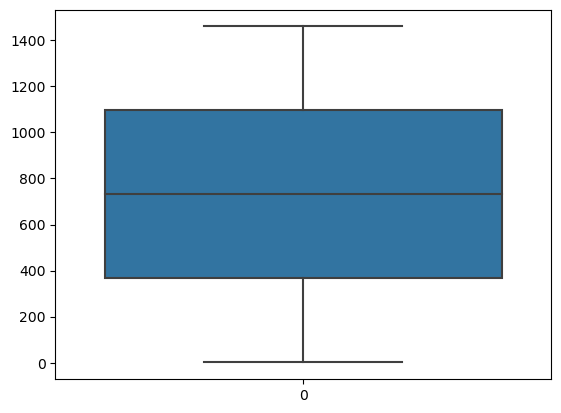

MSSubClass


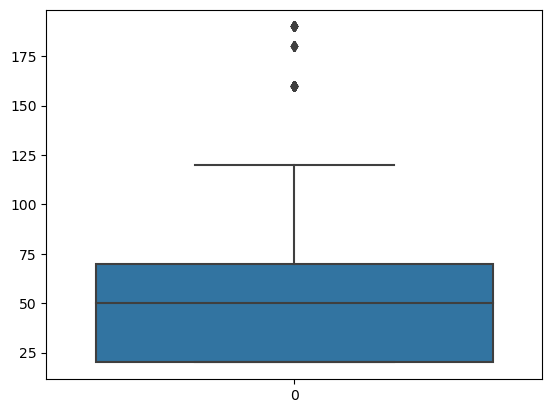

LotFrontage


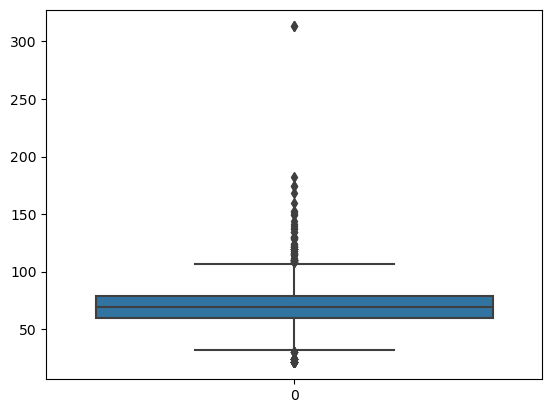

LotArea


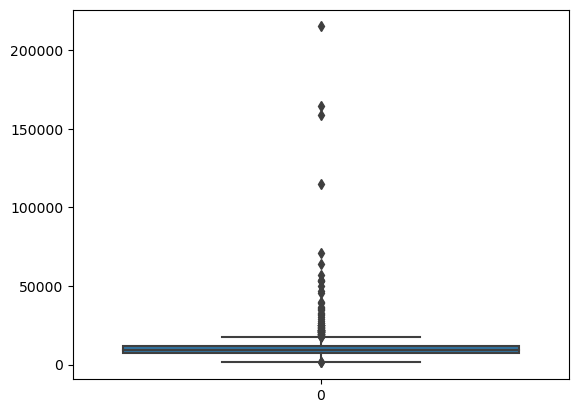

OverallQual


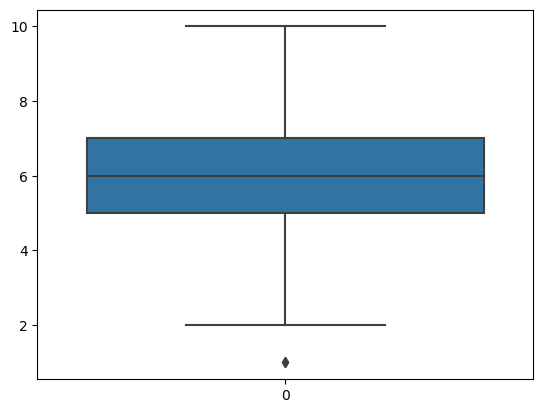

OverallCond


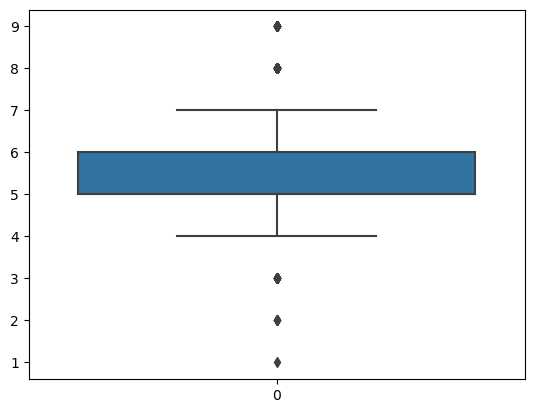

YearBuilt


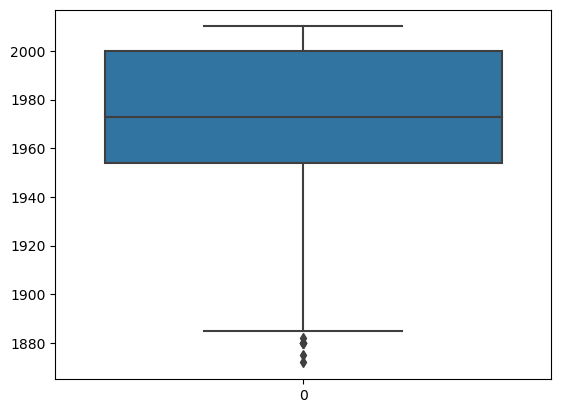

YearRemodAdd


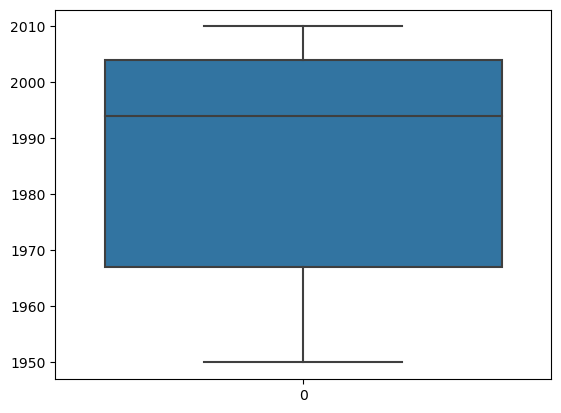

MasVnrArea


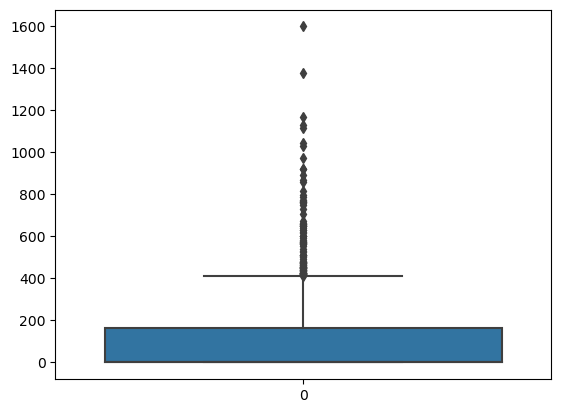

BsmtFinSF1


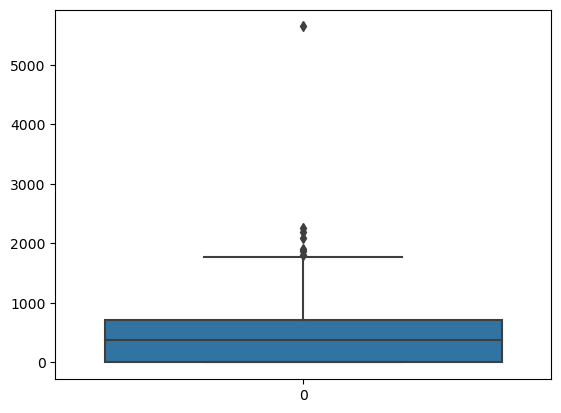

BsmtFinSF2


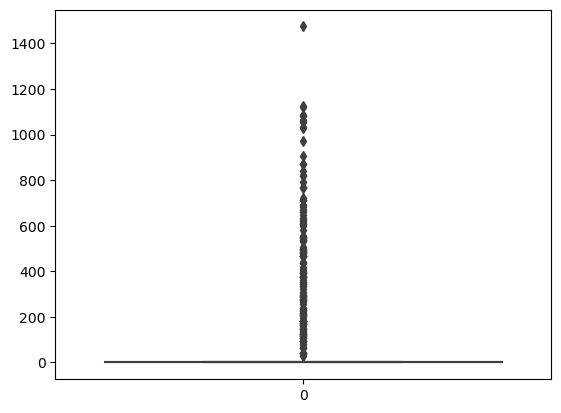

BsmtUnfSF


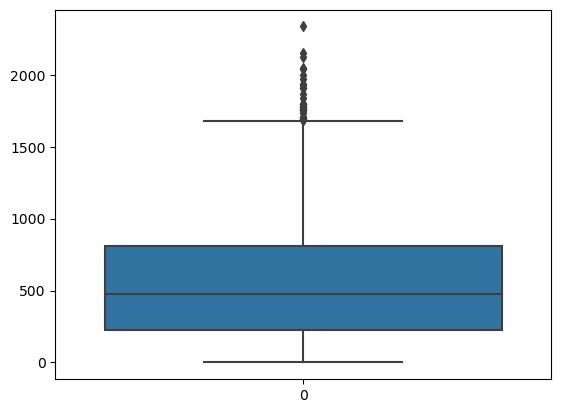

TotalBsmtSF


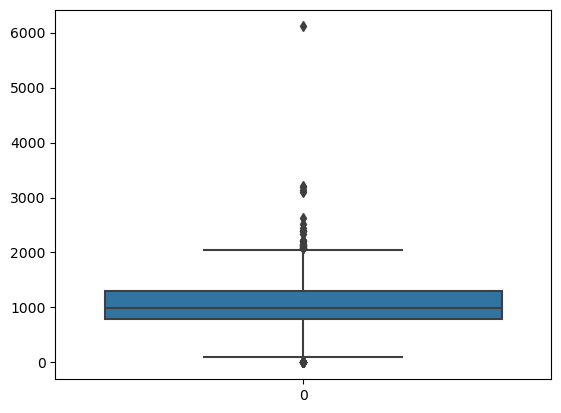

1stFlrSF


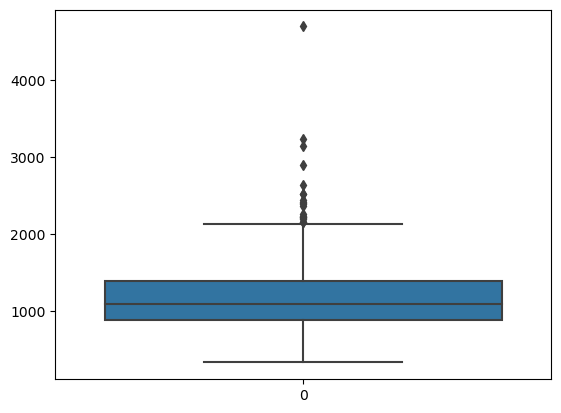

2ndFlrSF


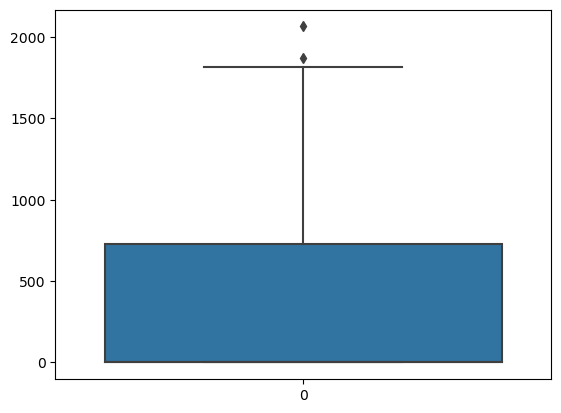

LowQualFinSF


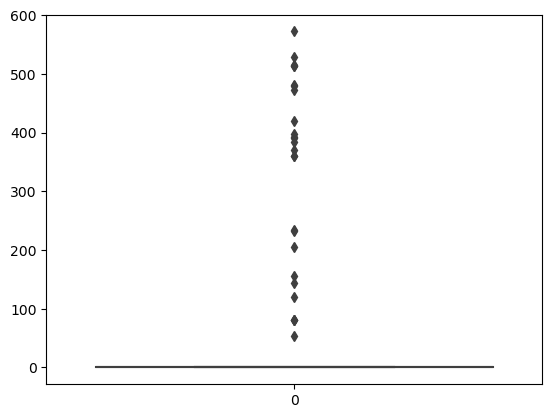

GrLivArea


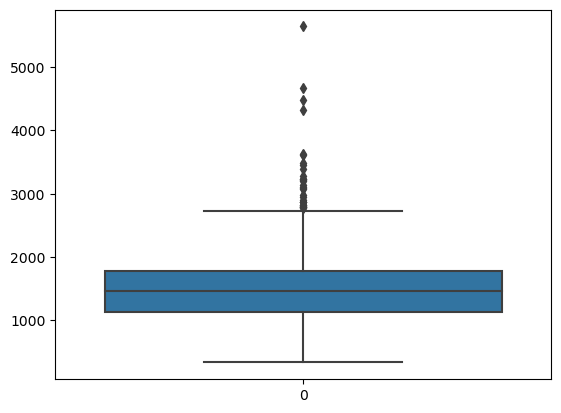

BsmtFullBath


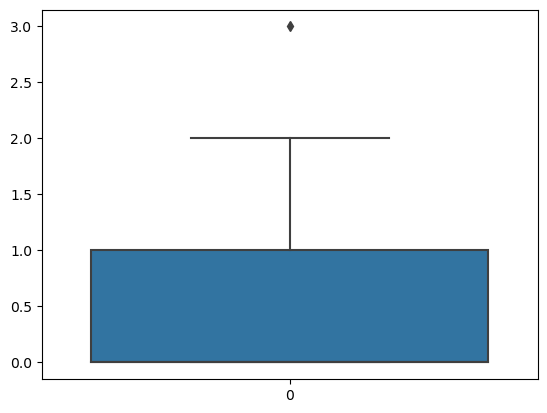

BsmtHalfBath


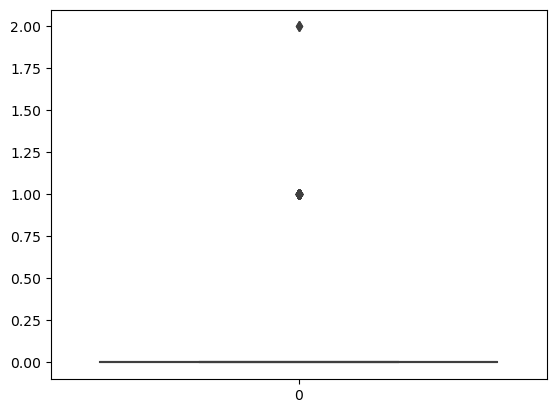

FullBath


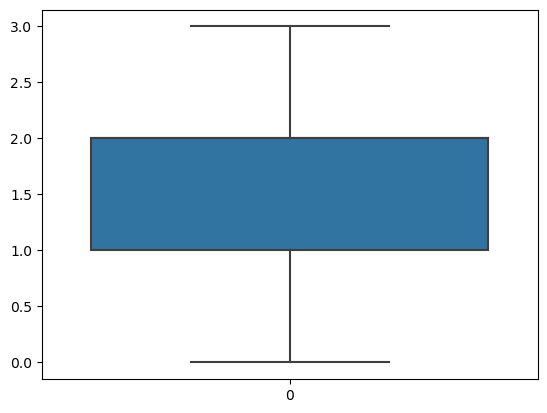

HalfBath


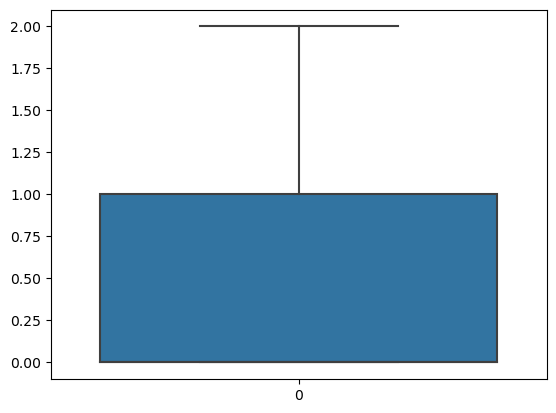

BedroomAbvGr


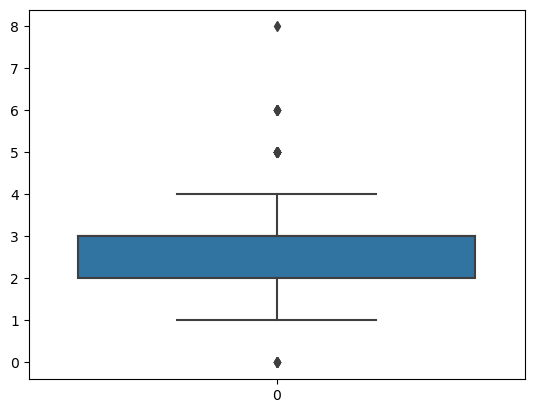

KitchenAbvGr


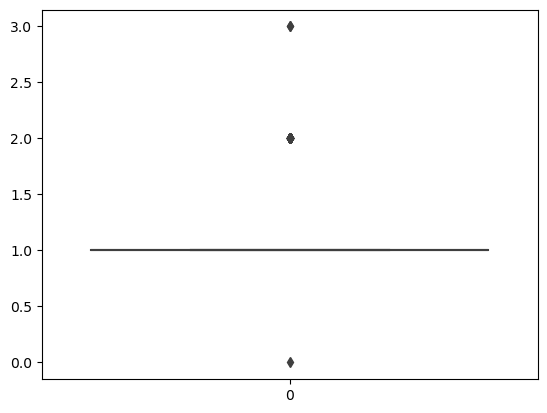

TotRmsAbvGrd


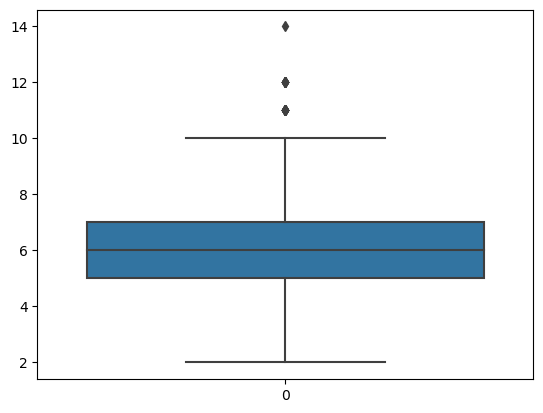

Fireplaces


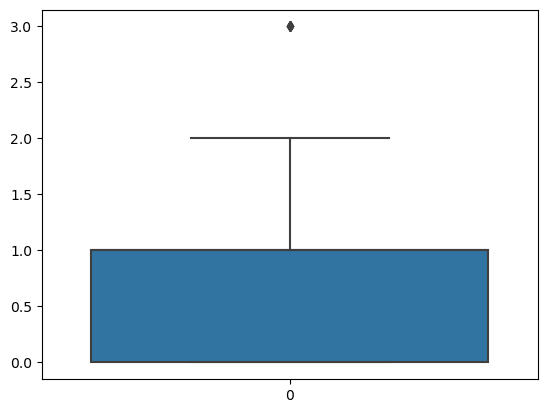

GarageYrBlt


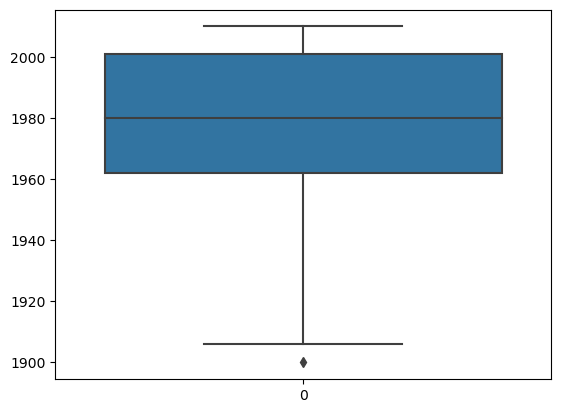

GarageCars


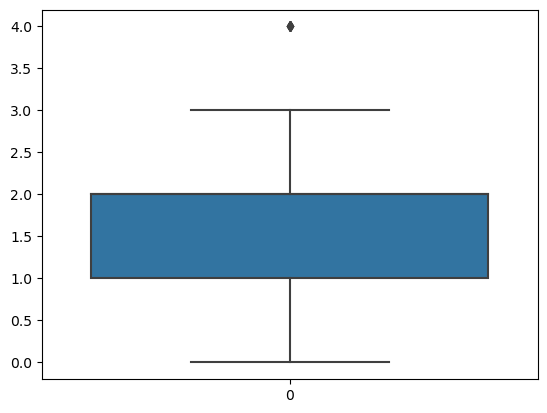

GarageArea


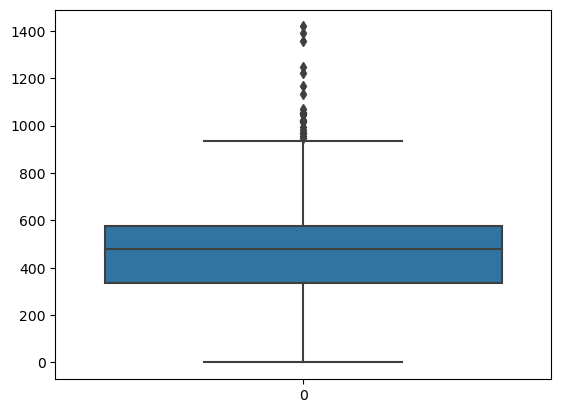

WoodDeckSF


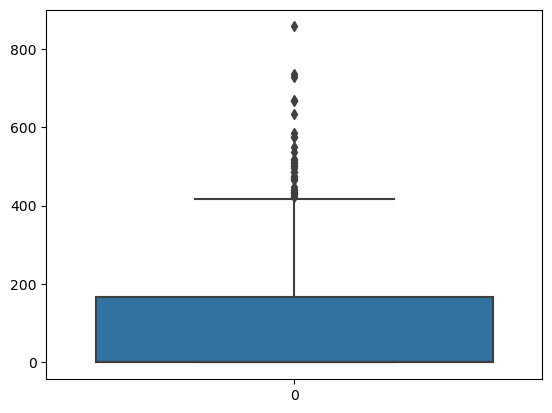

OpenPorchSF


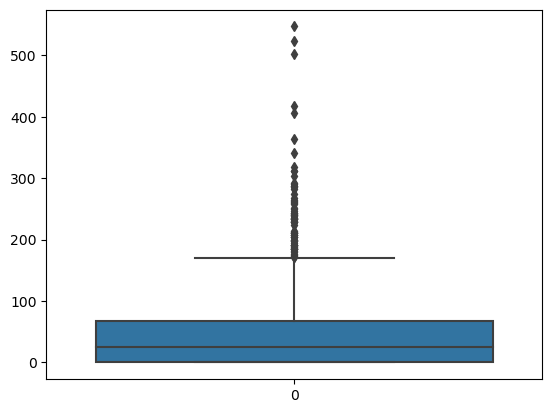

EnclosedPorch


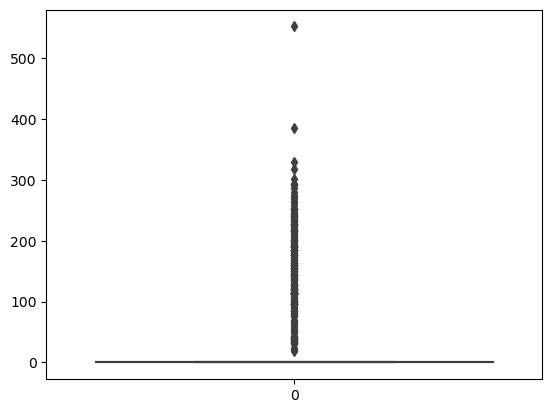

3SsnPorch


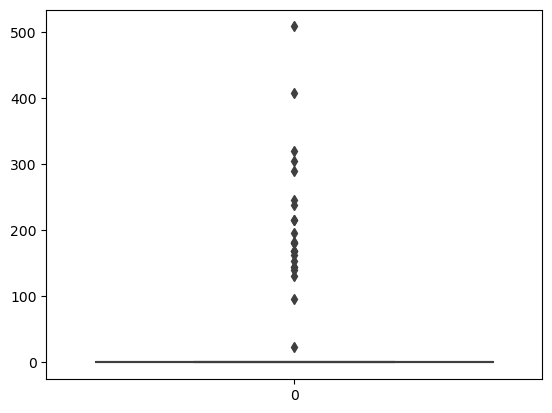

ScreenPorch


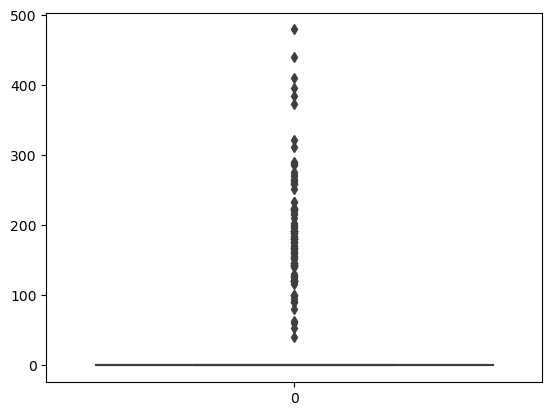

PoolArea


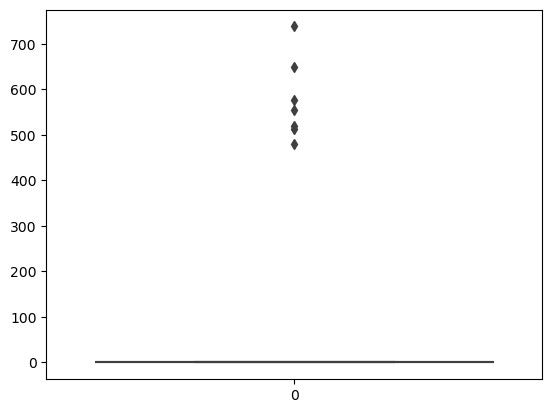

MiscVal


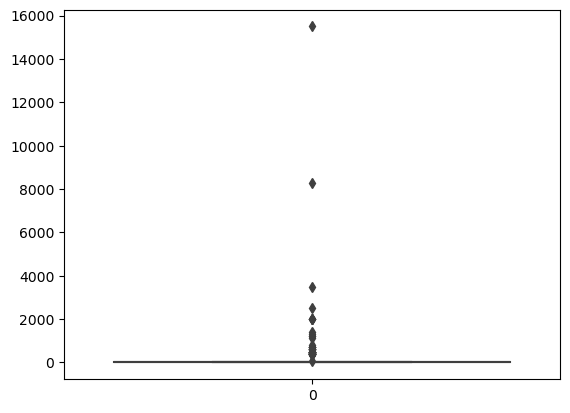

MoSold


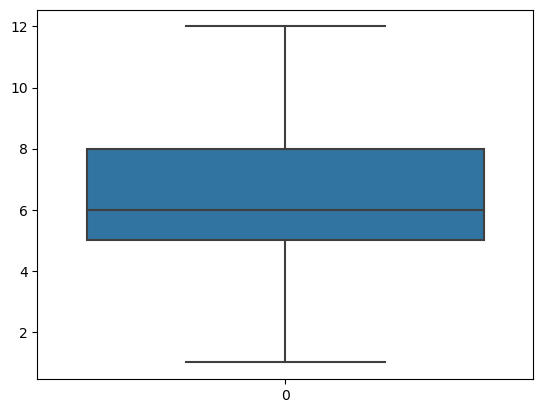

YrSold


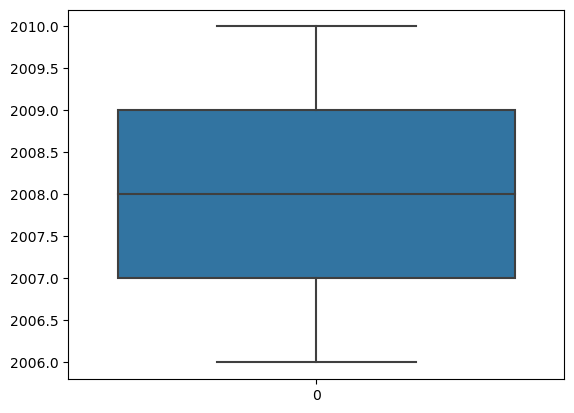

SalePrice


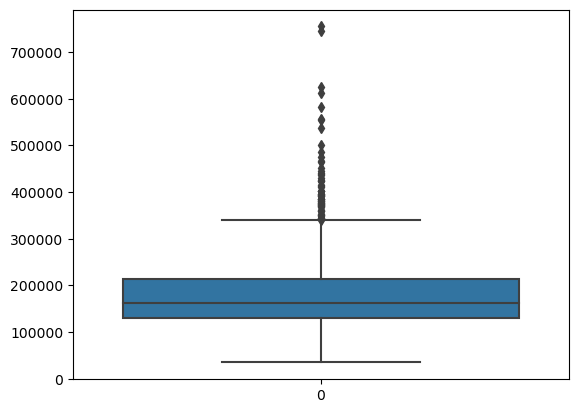

In [33]:
for i in df_train.select_dtypes(exclude='object').columns:
    print(i)
    sns.boxplot(df_train[i])
    plt.show()

# encoding

In [34]:
# train

In [35]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [37]:
for i in obj_train_cols:
    print(df_train[i].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    1419
Pave      41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenke

### OHE

In [38]:
df_train = pd.get_dummies(df_train, columns=obj_train_cols, drop_first=True)

In [39]:
# test

In [40]:
df_test = pd.get_dummies(df_test, columns=obj_test_cols, drop_first=True)

In [41]:
df_train.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,True,False,True,False,

In [42]:
df_train.shape

(1460, 246)

In [43]:
df_test.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False

In [44]:
df_test.shape

(1459, 227)

# scaling

In [45]:
# splitting into independent and dependent variables

In [46]:
# train

In [47]:
X=df_train.drop(['Id', 'SalePrice'], axis=1)
Y=df_train['SalePrice']

In [48]:
#Scaling on train data
from sklearn.preprocessing import MinMaxScaler # using min max coz it does not affect the scaling of OHE cols and hence we dont need to do separately for numerical and categorical cols
scaler=MinMaxScaler()
X_sc_train=scaler.fit_transform(X) # here the X remains unchanged but new X_sc_train is the transformed version of X.
X_sc_train=pd.DataFrame(X_sc_train, columns=X.columns)



In [49]:
# test

In [50]:
X_=df_test.drop(['Id'], axis=1)

creating the shape of the train and test data to be same so that scaling of train can be also applied to test data...

In [51]:
for i in X.columns:
    if i not in X_.columns:
        X_[i]=0

In [52]:
X.shape

(1460, 244)

In [53]:
X_.shape

(1459, 244)

creating the columns names in the same order of both train and test X data

In [54]:
X_=X_.loc[:, X.columns]

X_sc_test=scaler.transform(X_)

X_sc_test=pd.DataFrame(X_sc_test, columns=X_.columns)

In [55]:
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,False,False,True,False,True,False,False,False,True,False

In [56]:
X_.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,False,True,False,False,True,False,False

# checking for multicollinearity

 - chosen Spearman as it can be applied for non-normal data distribution 

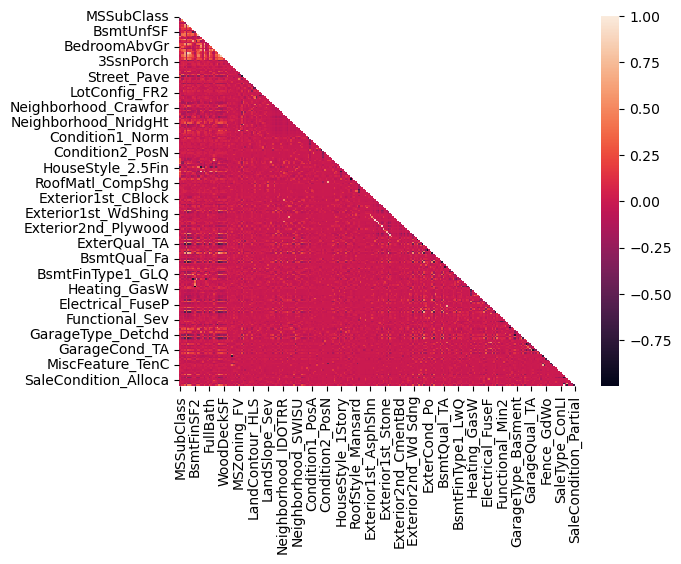

In [58]:
mask = np.triu(np.ones_like(X_sc_train.corr(method='spearman'))) 
sns.heatmap(X_sc_train.corr(method='spearman'), mask=mask)
plt.show()

In [59]:
# for identifying the cols with high correlation: to identify multicollinearity >0.85

corr_matrix=X_sc_train.corr(method='spearman')
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,NaN,-0.280102,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025821,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.0

In [60]:

list_c_high, list_c_low=[],[]
list_i_high, list_i_low=[],[]
list_corr_high, list_corr_low=[],[]
for i in upper.columns:
    for j in upper.index:
        p=upper.loc[i,j]
        if (p>0.9 and p<1) or (p<-0.9):
            list_c_high.append(i)
            list_i_high.append(j)
            list_corr_high.append(p)

df_corr_high=pd.DataFrame(data={"var1":list_c_high, "var2": list_i_high, "correlation": list_corr_high})




In [61]:
df_corr_high

,var1,var2,correlation
0,BsmtFinSF2,BsmtFinType2_Unf,-0.993949
1,RoofStyle_Gable,RoofStyle_Hip,-0.933462
2,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.974171
3,Exterior1st_MetalSd,Exterior2nd_MetalSd,0.973065
4,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.977525
5,MasVnrType_BrkFace,MasVnrType_Stone,-0.940758
6,ExterQual_Gd,ExterQual_TA,-0.906121
7,SaleType_New,SaleCondition_Partial,0.986819


In [63]:
# dropping highly collinear columns: i.e. dropping all var1 column from X and X_

In [64]:
# train

In [65]:
X_sc_train_no_corr=X_sc_train.drop(columns=df_corr_high['var1'].values, axis=1)

In [66]:
# test

In [67]:
X_sc_test_no_corr=X_sc_test.drop(columns=df_corr_high['var1'].values, axis=1)

In [69]:
# checking VIF to see which columns show high multicollinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
import statsmodels.api as sm # required for adding a constant

In [70]:
X1=X_sc_train_no_corr

X1=sm.add_constant(X1)

In [71]:

def VIF_cal(X1):
    
    VIF=[]
    for col in range(len(X1.columns)):
        VIF.append(variance_inflation_factor(X1,col))

    VIF_df=pd.DataFrame({'var':X1.columns, 'VIF':VIF})
    return VIF_df

In [74]:
vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
12,1stFlrSF,inf
13,2ndFlrSF,inf
14,LowQualFinSF,inf
15,GrLivArea,inf
119,Exterior1st_CBlock,inf
130,Exterior2nd_CBlock,inf


In [75]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [76]:
X1=X1.drop(['1stFlrSF'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
118,Exterior1st_CBlock,inf
129,Exterior2nd_CBlock,inf


In [77]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [78]:
X1=X1.drop(['Exterior1st_CBlock'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,26685.903865


In [79]:
vif_table[vif_table['VIF']>50]

,var,VIF
0,const,26685.903865
108,RoofMatl_CompShg,62.690528
144,ExterCond_Gd,75.348781
146,ExterCond_TA,89.245407
198,GarageType_Attchd,76.014701
202,GarageType_Detchd,64.181107
205,GarageQual_Fa,81.506167
208,GarageQual_TA,111.535244
209,GarageCond_Fa,79.672763
212,GarageCond_TA,116.859824


In [80]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [81]:
X1=X1.drop(['GarageCond_TA'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,26335.590881


In [82]:
vif_table[vif_table['VIF']>50]

,var,VIF
0,const,26335.590881
108,RoofMatl_CompShg,62.636971
144,ExterCond_Gd,75.342400
146,ExterCond_TA,89.245345
198,GarageType_Attchd,76.010994
202,GarageType_Detchd,64.176091


In [83]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [84]:
X1=X1.drop(['ExterCond_TA'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,25652.234197


In [85]:
vif_table[vif_table['VIF']>50]

,var,VIF
0,const,25652.234197
108,RoofMatl_CompShg,62.583982
197,GarageType_Attchd,76.006773
201,GarageType_Detchd,64.166657


In [86]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [87]:
X1=X1.drop(['GarageType_Attchd'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,25437.176493


In [88]:
vif_table[vif_table['VIF']>50]

,var,VIF
0,const,25437.176493
108,RoofMatl_CompShg,62.571511


In [89]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [90]:
X1=X1.drop(['RoofMatl_CompShg'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,19170.522148


In [91]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,19170.522148
37,MSZoning_RL,48.543390
217,MiscFeature_Shed,41.612301
11,TotalBsmtSF,38.609713
169,Heating_GasA,36.798393
9,BsmtFinSF1,35.795981
10,BsmtUnfSF,34.555154
1,MSSubClass,34.325495
38,MSZoning_RM,32.520107
205,GarageQual_TA,27.284464


In [92]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [93]:
X1=X1.drop(['MSZoning_RL'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,18989.611564


In [94]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,18989.611564
216,MiscFeature_Shed,41.558298
11,TotalBsmtSF,38.608595
168,Heating_GasA,36.758260
9,BsmtFinSF1,35.789006
10,BsmtUnfSF,34.552836
1,MSSubClass,34.296759
204,GarageQual_TA,27.244077
135,Exterior2nd_VinylSd,25.584954
12,2ndFlrSF,24.436331


In [95]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [96]:
X1=X1.drop(['MiscFeature_Shed'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,7006.387413


In [97]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,7006.387413
11,TotalBsmtSF,38.594842
168,Heating_GasA,36.757829
9,BsmtFinSF1,35.738202
10,BsmtUnfSF,34.505752
1,MSSubClass,34.293368
204,GarageQual_TA,27.233477
135,Exterior2nd_VinylSd,25.541780
12,2ndFlrSF,24.422337
128,Exterior2nd_HdBoard,24.049011


In [98]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [99]:
X1=X1.drop(['TotalBsmtSF'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,6967.241075


In [100]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,6967.241075
167,Heating_GasA,36.724931
1,MSSubClass,34.238637
203,GarageQual_TA,27.201213
134,Exterior2nd_VinylSd,25.538001
127,Exterior2nd_HdBoard,23.986017
11,2ndFlrSF,23.153425
168,Heating_GasW,22.289181
63,Neighborhood_NAmes,22.280804
200,GarageQual_Fa,21.843786


In [101]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [102]:
X1=X1.drop(['Heating_GasA'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,5074.911904


In [103]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,5074.911904
1,MSSubClass,34.225302
202,GarageQual_TA,27.201112
134,Exterior2nd_VinylSd,25.489479
127,Exterior2nd_HdBoard,23.980568
11,2ndFlrSF,23.141095
63,Neighborhood_NAmes,22.268222
199,GarageQual_Fa,21.830442
135,Exterior2nd_Wd Sdng,20.875280
13,GrLivArea,19.292108


In [104]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [105]:
X1=X1.drop(['MSSubClass'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,5054.078591


In [106]:
vif_table[vif_table['VIF']>10].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,5054.078591
201,GarageQual_TA,27.193793
133,Exterior2nd_VinylSd,25.482108
126,Exterior2nd_HdBoard,23.970956
10,2ndFlrSF,23.085103
62,Neighborhood_NAmes,22.247955
198,GarageQual_Fa,21.823415
134,Exterior2nd_Wd Sdng,20.868771
12,GrLivArea,19.285798
67,Neighborhood_OldTown,17.793854


In [107]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [108]:
X1=X1.drop(['Exterior2nd_VinylSd', 'GarageQual_TA', '2ndFlrSF', 'Neighborhood_NAmes'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,4072.106116


In [109]:
vif_table[vif_table['VIF']>5].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,4072.106116
186,FireplaceQu_Gd,15.583436
188,FireplaceQu_TA,14.329524
5,YearBuilt,14.319156
11,GrLivArea,13.354005
112,Exterior1st_HdBoard,13.286309
124,Exterior2nd_HdBoard,13.116844
82,Condition2_Norm,11.664812
146,BsmtQual_TA,11.591946
131,Exterior2nd_Wd Sdng,10.963954


In [110]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [111]:
X1=X1.drop(['FireplaceQu_Gd', 'YearBuilt', 'GrLivArea', 'Exterior1st_HdBoard'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,3943.99254


In [112]:
vif_table[vif_table['VIF']>5].sort_values(by='VIF', ascending=False)

,var,VIF
0,const,3943.992540
80,Condition2_Norm,11.664447
143,BsmtQual_TA,11.310033
159,BsmtFinType2_Unf,10.579975
175,KitchenQual_TA,9.958454
181,Functional_Typ,9.694765
128,Exterior2nd_Wd Sdng,8.088314
137,Foundation_PConc,7.602994
114,Exterior1st_Wd Sdng,7.508501
174,KitchenQual_Gd,7.225804


In [113]:
# dropping high multicollinearity columns and checking multicollinearity again...

In [114]:
X1=X1.drop(['Condition2_Norm', 'BsmtQual_TA', 'BsmtFinType2_Unf'], axis=1)


vif_table=VIF_cal(X1)

max_vif=vif_table[vif_table['VIF']==vif_table['VIF'].max()]

max_vif

,var,VIF
0,const,2620.56225


In [78]:
# vif_table[vif_table['VIF']>5].sort_values(by='VIF', ascending=False)

# Model building

In [116]:
# train-test split

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, random_state=101, test_size=0.25)


In [118]:
# OLS method: for OLS I am using X1 data after deleting multicollinear cols

In [119]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [120]:
ols=OLS(Y, X1)

In [121]:
ols_result=ols.fit()

In [122]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     51.83
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:57:28   Log-Likelihood:                -16870.
No. Observations:                1460   AIC:                         3.417e+04
Df Residuals:                    1245   BIC:                         3.531e+04
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.072e+05   3.66e+04      5.662      0.000    1.35e+05    2.79e+05
LotFrontage           -2.895e+04   1.47e+04     -1.966      0.050   -5.78e+04     -62.179
LotArea                1.514e+05   2.71e+04      5.577      0.000    9.81e+04    2.05e+05
OverallQual            9.244e+04   1.05e+04      8.825      0.000    7.19e+04    1.13e+05
OverallCond             3.81e+04   7978.987      4.775      0.000    2.24e+04    5.38e+04
YearRemodAdd           7004.6902   3920.864      1.787      0.074    -687.540    1.47e+04
MasVnrArea             3.909e+04   8796.347      4.444      0.000    2.18e+04    5.64e+04
BsmtFinSF1             9.372e+04   2.21e+04      4.245      0.000    5.04e+04    1.37e+05
BsmtUnfSF              2.676e+04   8162.165      3.279      0.001    1.07e+04    4.28e+04
LowQualFinSF          -2.947e+04   1.21e+04     -2.427      0.015   -5.33e+04   -5647.277
BsmtFullBath           1.673e+04   6875.602      2.434      0.015    3244.702    3.02e+04
BsmtHalfBath           1154.0717   7123.147      0.162      0.871   -1.28e+04    1.51e+04
FullBath               5.096e+04   7435.649      6.854      0.000    3.64e+04    6.55e+04
HalfBath               1.839e+04   4830.691      3.806      0.000    8910.481    2.79e+04
BedroomAbvGr           -2.15e+04   1.28e+04     -1.684      0.092   -4.65e+04    3540.763
KitchenAbvGr          -4.849e+04   1.98e+04     -2.453      0.014   -8.73e+04   -9706.649
TotRmsAbvGrd           9.888e+04   1.19e+04      8.297      0.000    7.55e+04    1.22e+05
Fireplaces             1.694e+04   5390.387      3.143      0.002    6368.098    2.75e+04
GarageYrBlt            4038.4086   7183.434      0.562      0.574   -1.01e+04    1.81e+04
GarageCars             3.923e+04   1.02e+04      3.855      0.000    1.93e+04    5.92e+04
GarageArea             5584.2047   1.26e+04      0.443      0.658   -1.92e+04    3.03e+04
WoodDeckSF             2.282e+04   5948.812      3.836      0.000    1.11e+04    3.45e+04
OpenPorchSF            8464.3034   7410.657      1.142      0.254   -6074.451     2.3e+04
EnclosedPorch           575.8059   8049.822      0.072      0.943   -1.52e+04    1.64e+04
3SsnPorch              2.266e+04   1.36e+04      1.671      0.095   -3937.538    4.93e+04
ScreenPorch            2.544e+04   7023.281      3.622      0.000    1.17e+04    3.92e+04
PoolArea              -5.231e+04   2.36e+04     -2.212      0.027   -9.87e+04   -5916.884
MiscVal               -4311.6656   2.66e+04     -0.162      0.871   -5.64e+04    4.78e+04
MoSold                -5284.2928   3203.305     -1.650      0.099   -1.16e+04    1000.180
YrSold                -3178.8441   2446.645     -1.299      0.194   -7978.846    1621.158
MSZoning_FV            8958.8540   7992.997      1.121      0.263   -6722.378    2.46e+04
MSZoning_RH            

## Linear Regression: using X_sc_train after deleting the multicollinear cols

In [123]:
X_sc_train_no_corr=X_sc_train_no_corr.drop(['Condition2_Norm', 'BsmtQual_TA', 'BsmtFinType2_Unf', 'FireplaceQu_Gd', 'YearBuilt', 'GrLivArea', 'Exterior1st_HdBoard', 'Exterior2nd_VinylSd', 'GarageQual_TA', '2ndFlrSF', 'Neighborhood_NAmes', 'MSSubClass', 'Heating_GasA', 'TotalBsmtSF', 'MiscFeature_Shed', 'MSZoning_RL', 'RoofMatl_CompShg', 'GarageType_Attchd', 'ExterCond_TA', 'GarageCond_TA', 'Exterior1st_CBlock', '1stFlrSF'], axis=1)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [128]:
Y_train_predict=lin_mod.predict(X_train)
Y_test_predict=lin_mod.predict(X_test)

In [74]:
from sklearn.metrics import r2_score

In [130]:
r2_score(Y_test, Y_test_predict)# testing accuracy

-1.302749287459692e+25

In [131]:
r2_score(Y_train, Y_train_predict)# training accuracy  

0.9185687735823375

In [132]:
# so the training accuracy is high but the testing accuracy is dismal if we take the original X_sc_train without dropping the 
#cols which show high multicollinearity in VIF. And so now the approach should be to drop the same high VIF columns that were 
#dropped for X1 used in OLS. 
# So this is a sign of overfitting and lack of generalization that could be due to the high multicollinearity of the columns.


#Insights:
# even after deleting all those highly multicollinear columns of X_sc_train found using VIF, the testing accuracy is just horrible and the training accuracy reduced by 2%. 

## Linear regression without scaling the data: The X used here is unscaled data and not treated for multicollinearity

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=101)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [136]:
Y_train_predict=lin_mod.predict(X_train)
Y_test_predict=lin_mod.predict(X_test)

In [137]:
r2_score(Y_test, Y_test_predict)# testing accuracy

0.661270710079984

In [138]:
r2_score(Y_train, Y_train_predict)# training accuracy  

0.933782845692805

In [141]:
# insight:

#the testing accuracy is better than that obtained in the scaled version of the data.
# Although there is high overfitting and a lack of generalization of the model to unseen data.
# The approach would be to now drop the highly multicollinear cols from this unscaled X data and fit a model again.

In [142]:
# X1=scaled data and removed multicollinearity which is used for ols
# X_sc_train: scaled and removed multicollinearity
# X: unscaled data with multicollinearity
# X_no_collinearity: unscaled data and removed collinearity

## Linear Regression: Using the unscaled data but now dropping all the highly multicollinear cols

In [139]:
X_no_collinearity=X.drop(columns=df_corr_high['var1'].values, axis=1) # dropping highly collienar cols from heatmap
X_no_collinearity=X_no_collinearity.drop(['Condition2_Norm', 'BsmtQual_TA', 'BsmtFinType2_Unf', 'FireplaceQu_Gd', 'YearBuilt', 'GrLivArea', 'Exterior1st_HdBoard', 'Exterior2nd_VinylSd', 'GarageQual_TA', '2ndFlrSF', 'Neighborhood_NAmes', 'MSSubClass', 'Heating_GasA', 'TotalBsmtSF', 'MiscFeature_Shed', 'MSZoning_RL', 'RoofMatl_CompShg', 'GarageType_Attchd', 'ExterCond_TA', 'GarageCond_TA', 'Exterior1st_CBlock', '1stFlrSF'], axis=1)

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_no_collinearity,Y,train_size=0.75,random_state=101)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [143]:
Y_train_predict=lin_mod.predict(X_train)
Y_test_predict=lin_mod.predict(X_test)

In [144]:
r2_score(Y_test, Y_test_predict)# testing accuracy

0.7104260989539828

In [145]:
r2_score(Y_train, Y_train_predict)# training accuracy  (so in comparison to the unscaled data without dropping highly collinear cols, the decrease in acc is only 2%)

0.9185917116964433

In [146]:
# insight:
# clear sign of overfitting of the data


# also notice, that the training accuracy obtained from linear reg model and OLS is similar. It should be similar always, otherwise there is a problem which must be investigated.

In [147]:
# I am suspecting that if the outliers did make a probelm then I would have
# gotten a low training accuracy instead of an overfitting problem.

# gradient descent regressor: using scaled data and removed all multicollinear cols

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

In [149]:
from sklearn.linear_model import SGDRegressor

In [150]:
sgdr=SGDRegressor(max_iter=100000)
sgdr.fit(X_train, Y_train)

SGDRegressor(max_iter=100000)

In [151]:
Y_train_predict=sgdr.predict(X_train)
Y_test_predict=sgdr.predict(X_test)

In [152]:
r2_score(Y_test, Y_test_predict)# testing accuracy

0.7968537173029844

In [153]:
r2_score(Y_train, Y_train_predict)

0.8867580581603642

In [154]:
# insight: it is still overfitting but the overfitting has reduced from the Linear Regression model case.

# will tune this model further to get a better accuracy 

# using Lasso and Ridge: to treat overfitting: using scaled data and removed multicollinear cols

In [155]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

## Lasso

In [158]:
lasso=Lasso(alpha=550.0, max_iter=10000)
lasso.fit(X_train, Y_train)

Lasso(alpha=550.0, max_iter=10000)

In [159]:
Y_train_predict=lasso.predict(X_train)
Y_test_predict=lasso.predict(X_test)

In [160]:
r2_score(Y_test, Y_test_predict)# testing accuracy

0.7901160143179327

In [161]:
r2_score(Y_train, Y_train_predict)

0.8361291853763123

## lasso cv

In [164]:
lasso_cv=LassoCV(alphas=np.arange(50,600, 100), max_iter=10000, cv=5)
lasso_cv.fit(X_train, Y_train)

LassoCV(alphas=array([ 50, 150, 250, 350, 450, 550]), cv=5, max_iter=10000)

In [165]:
Y_train_predict=lasso_cv.predict(X_train)
Y_test_predict=lasso_cv.predict(X_test)

In [166]:
r2_score(Y_test, Y_test_predict) 

0.7910360136898733

In [167]:
r2_score(Y_train, Y_train_predict) 

0.8898341450927763

In [168]:
lasso_cv.alphas_

array([550, 450, 350, 250, 150,  50])

In [169]:
lasso_cv.alpha_

150

In [170]:
lasso_cv.mse_path_ 

array([[1.74021033e+09, 1.05117342e+09, 1.08488214e+09, 1.47932332e+09,
        7.80385291e+08],
       [1.68274770e+09, 1.05114926e+09, 1.03466377e+09, 1.42940724e+09,
        7.32201994e+08],
       [1.58994102e+09, 1.04078510e+09, 9.49652748e+08, 1.37220133e+09,
        6.84239823e+08],
       [1.50353631e+09, 1.02170125e+09, 8.38356330e+08, 1.31169949e+09,
        6.55155417e+08],
       [1.38539434e+09, 1.01885764e+09, 7.18338405e+08, 1.31331215e+09,
        6.73912727e+08],
       [1.21286444e+09, 1.10215422e+09, 6.73176171e+08, 1.48312755e+09,
        8.70034066e+08]])

## Ridge: 

In [175]:
ridge=Ridge(alpha=18.0)
ridge.fit(X_train, Y_train)

Ridge(alpha=18.0)

In [176]:
Y_train_predict=ridge.predict(X_train)
Y_test_predict=ridge.predict(X_test)

In [177]:
r2_score(Y_test, Y_test_predict)

0.8004942858681259

In [178]:
r2_score(Y_train, Y_train_predict)

0.8637969995547156

## ridge cv:

In [180]:
ridge_cv=RidgeCV(alphas=np.arange(50,600, 100), cv=5, scoring='r2')
ridge_cv.fit(X_train, Y_train)

RidgeCV(alphas=array([ 50, 150, 250, 350, 450, 550]), cv=5, scoring='r2')

In [181]:
ridge_cv.best_score_ 

0.7798274340124962

In [182]:
ridge_cv.alpha_ 

50

## robust regressor: robust to the presence of outliers: used scaled data and removed multicollinearity

## huber Regressor

In [184]:
from sklearn.linear_model import HuberRegressor

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

In [186]:
hr=HuberRegressor()
hr.fit(X_train, Y_train)

HuberRegressor()

In [187]:
Y_train_predict=hr.predict(X_train)
Y_test_predict=hr.predict(X_test)

In [188]:
r2_score(Y_test, Y_test_predict)

0.7956263277341454

In [189]:
r2_score(Y_train, Y_train_predict)

0.878641735246753

In [190]:
# notice that the presence of outliers in the previous models indeed did not 
# create much of a problem as the train accuracy and the test accuracy is 
# pretty much similar all along. 

# so outlier removal is not important for this data

## decision tree

In [191]:
from sklearn.tree import DecisionTreeRegressor

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

In [260]:
dtr=DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

In [261]:
Y_train_predict=dtr.predict(X_train)
Y_test_predict=dtr.predict(X_test)

In [262]:
r2_score(Y_test, Y_test_predict) 

0.6766619281221895

In [263]:
r2_score(Y_train, Y_train_predict) 

0.8963326338191322

## random forest

In [ ]:
# basic

In [273]:
from sklearn.ensemble import RandomForestRegressor

In [535]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_no_corr,Y,train_size=0.75,random_state=101)

In [275]:
rfr=RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_train_predict=rfr.predict(X_train)
Y_test_predict=rfr.predict(X_test)

In [276]:
r2_score(Y_test, Y_test_predict)

0.8144913057515272

In [277]:
r2_score(Y_train, Y_train_predict) 

0.9762196737863875

In [ ]:
# randomsearchCV tuning

In [283]:
from sklearn.model_selection import RandomizedSearchCV

In [284]:
rfr=RandomForestRegressor()

param_grid_rfr={'max_depth':[6,7,8],
               'min_samples_leaf': [13,15,17],
               'n_estimators': [100, 200, 300],
               'max_features': ["sqrt", "log2", None]}



random_cv_rfr=RandomizedSearchCV(rfr, param_distributions=param_grid_rfr,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_rfr.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   param_distributions={'max_depth': [6, 7, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [13, 15, 17],
                                        'n_estimators': [100, 200, 300]},
                   random_state=101, scoring='neg_mean_squared_error')

In [285]:
random_cv_rfr.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 13,
 'max_features': None,
 'max_depth': 8}

In [286]:
random_cv_rfr.best_score_

-1316099936.5978599

In [78]:
from sklearn.model_selection import cross_val_score

In [399]:
%%time

model=RandomForestRegressor(n_estimators= 100,
 min_samples_leaf= 13,
 max_features= None,
 max_depth= 8)
r2_score_cv=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv


CPU times: total: 2.86 s
Wall time: 2.99 s


array([0.75100314, 0.78185638, 0.86611038, 0.75420406, 0.83879341])

In [400]:
r2_score_cv.mean()

0.7983934777689649

In [ ]:
#insight: tuning is not making it any better.

# increasing the n-estimators is not making it better

In [ ]:
# manual tuning: best params

In [487]:
rfr=RandomForestRegressor(max_depth=7, min_samples_leaf=10, n_estimators= 100, max_features= None)
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, max_features=None, min_samples_leaf=10)

In [488]:
Y_train_predict=rfr.predict(X_train)
Y_test_predict=rfr.predict(X_test)

In [489]:
r2_score(Y_test, Y_test_predict)

0.7923053364394936

In [490]:
r2_score(Y_train, Y_train_predict) 

0.8771325503320223

In [491]:
r2_score_cv=cross_val_score(rfr, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv.mean()

0.8043263022341651

In [ ]:
# increasing the estimators above 100 is not improving test and train acc
# increasing the depth above 7 is not improving test and train acc
# optimal leaf samples are 10 and going above or below is not good

# KNN

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [295]:
#basic model

In [311]:
r2score_train=[]
r2score_test=[]


for i in range(1, 40):
    knn=KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn.fit(X_train, Y_train)
    Y_train_predict=knn.predict(X_train)
    Y_test_predict=knn.predict(X_test)
    r2score_test.append(r2_score(Y_test, Y_test_predict))
    r2score_train.append(r2_score(Y_train, Y_train_predict))
    


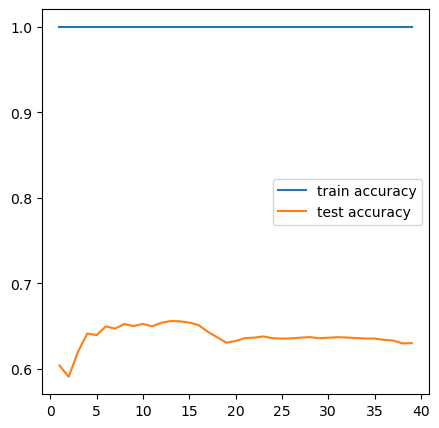

In [312]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40), r2score_train, label='train accuracy')
plt.plot(range(1,40), r2score_test, label='test accuracy')
plt.legend()
plt.show()

In [313]:
knn=KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, Y_train)
Y_train_predict=knn.predict(X_train)
Y_test_predict=knn.predict(X_test)

In [314]:
r2_score(Y_test, Y_test_predict)

0.6503865667498474

In [315]:
r2_score(Y_train, Y_train_predict) 

0.761034342719138

# SVM

In [214]:
from sklearn.svm import SVR

In [338]:
svr=SVR(kernel='rbf') #no other kernels are also giving good results
svr.fit(X_train, Y_train)
Y_train_predict=svr.predict(X_train)
Y_test_predict=svr.predict(X_test)

In [339]:
r2_score(Y_test, Y_test_predict)

-0.024561988572553428

In [340]:
r2_score(Y_train, Y_train_predict)

-0.045275708633369716

In [ ]:
# insight: not good performance

# Adaboost:

In [351]:
from sklearn.ensemble import AdaBoostRegressor

In [356]:
adar=AdaBoostRegressor()
adar.fit(X_train, Y_train)
Y_train_predict=adar.predict(X_train)
Y_test_predict=adar.predict(X_test)

In [357]:
r2_score(Y_test, Y_test_predict) 

0.7658446199969817

In [358]:
r2_score(Y_train, Y_train_predict)

0.8681430930879777

In [359]:
# Hyperparameter tuning 

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [361]:
%%time
param_grid_adar={'estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5)], 
            'n_estimators': [50,100,200],
           'learning_rate': [0.1, 0.01,0.001, 1, 2],
           'loss': ['linear', 'square', 'exponential']} # this effects how the new weights are updated


adar=AdaBoostRegressor()
random_cv_adar=RandomizedSearchCV(adar, param_distributions=param_grid_adar,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_adar.fit(X_train, Y_train)

CPU times: total: 10min 14s
Wall time: 10min 40s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=1000,
                   param_distributions={'estimator': [DecisionTreeRegressor(max_depth=3),
                                                      DecisionTreeRegressor(max_depth=4),
                                                      DecisionTreeRegressor(max_depth=5)],
                                        'learning_rate': [0.1, 0.01, 0.001, 1,
                                                          2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=101, scoring='neg_mean_squared_error')

In [362]:
random_cv_adar.best_estimator_

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), learning_rate=2,
                  loss='exponential', n_estimators=100)

In [363]:
random_cv_adar.best_score_

-1238160322.9923065

In [364]:
Y_train_predict=random_cv_adar.predict(X_train)
Y_test_predict=random_cv_adar.predict(X_test)

In [365]:
r2_score(Y_test, Y_test_predict)

0.8200604385291006

In [366]:
r2_score(Y_train, Y_train_predict)

0.9465148392461809

In [367]:
from sklearn.model_selection import cross_val_score

model=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), learning_rate=2,
                  loss='exponential', n_estimators=100)
r2_score_cv=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')

In [368]:
r2_score_cv

array([0.8001606 , 0.69931602, 0.86865019, 0.79741437, 0.84696365])

In [369]:
r2_score_cv.mean()

0.802500968203856

In [ ]:
# insights:

# hyperparam tuning improved the accuracy of test data as measured by cross val score.

In [ ]:
# manual tuning

In [556]:
adar=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7), learning_rate=0.1,
                  loss='exponential', n_estimators=250)
adar.fit(X_train, Y_train)
Y_train_predict=adar.predict(X_train)
Y_test_predict=adar.predict(X_test)

In [557]:
r2_score(Y_test, Y_test_predict)

0.8347753860401464

In [558]:
r2_score(Y_train, Y_train_predict)

0.9790696193455096

In [559]:
r2_score_cv=cross_val_score(adar, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv.mean()

0.7952324672650639

In [234]:
# import sklearn
# sklearn.metrics.get_scorer_names()

# XGBoost:

In [303]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
# basic model

In [325]:
xgbr=XGBRegressor()
xgbr.fit(X_train, Y_train)
Y_train_predict=xgbr.predict(X_train)
Y_test_predict=xgbr.predict(X_test)

In [326]:
r2_score(Y_test, Y_test_predict)

0.8460765542491975

In [327]:
r2_score(Y_train, Y_train_predict)

0.999729727743367

In [ ]:
# tuned

In [328]:
%%time
param_grid_xgbr={'n_estimators': [50,100,200],
           'learning_rate': [0.1, 0.01,0.001, 1, 2]} # this effects how the new weights are updated


xgbr=XGBRegressor()
random_cv_xgbr=RandomizedSearchCV(xgbr, param_distributions=param_grid_xgbr,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_xgbr.fit(X_train, Y_train)

CPU times: total: 6min 35s
Wall time: 30.9 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=1000,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 1,
                                                          2],
                                        'n_estimators': [50, 100, 200]},
                   random_state=101, scoring='neg_mean_squared_error')

In [329]:
Y_train_predict=random_cv_xgbr.predict(X_train)
Y_test_predict=random_cv_xgbr.predict(X_test)

In [330]:
r2_score(Y_test, Y_test_predict) # this is the r2score corresponding to the best fit parameter but for this sample data of X_test and Y_test

0.875245592950618

In [331]:
r2_score(Y_train, Y_train_predict)

0.9984034116695787

In [332]:
random_cv_xgbr.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [333]:
random_cv_xgbr.best_score_

-1048947024.6586542

In [ ]:
# cross-val-score

In [334]:
model=XGBRegressor(n_estimators=200, learning_rate=0.1)
r2_score_cv_xgbr=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv_xgbr

array([0.85846207, 0.79092199, 0.87720444, 0.80452977, 0.85971165])

In [335]:
r2_score_cv_xgbr.mean()# this is the mean r2score of the best fit pramameter model 

0.8381659831192426

In [ ]:
# manual tuning

In [337]:
model=XGBRegressor(n_estimators=200, learning_rate=0.04)
r2_score_cv_xgbr=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv_xgbr.mean()

0.8373089481941619

In [ ]:
# insights: increasing the learning rate decreases the cross val accuracy.
# increasing the n_estimators at a fixed learning rate is not improving the acc infact this parameter is not affecting the acc by changing by a few hundreds of estimators.
# decreasing the learning rate is improving the accuracy by few decimal percent.  
# ideal learning rate=0.04 for 450 estimators giving acc of 0.84%
# but dont decrease below 0.03 as the acc is decreasing further

In [ ]:
# giving the best performance

# Part 2: using PCA

# pca

In [ ]:
# applying pca on scaled data always:  No multicollinearity check is needed for pca 

In [ ]:
X_sc_train

In [291]:
from sklearn.decomposition import PCA

In [293]:
pca1=PCA()
X_sc_train_pca1=pca1.fit_transform(X_sc_train)

In [294]:
pca1.explained_variance_ratio_

array([1.66571085e-01, 6.24574297e-02, 4.68246500e-02, 3.04669428e-02,
       2.99564692e-02, 2.72198043e-02, 2.54588963e-02, 2.35647261e-02,
       2.34591418e-02, 2.20757951e-02, 2.13214276e-02, 1.91261206e-02,
       1.82256028e-02, 1.68817521e-02, 1.62959703e-02, 1.56535402e-02,
       1.40384722e-02, 1.39686452e-02, 1.34375848e-02, 1.30255751e-02,
       1.21596229e-02, 1.16144116e-02, 1.06705292e-02, 1.03338500e-02,
       9.97961570e-03, 9.20293244e-03, 9.13971002e-03, 8.91150712e-03,
       8.49464229e-03, 8.25476009e-03, 8.16257156e-03, 7.87027747e-03,
       7.26396426e-03, 7.04011541e-03, 6.78051494e-03, 6.47230871e-03,
       6.24455968e-03, 6.16188033e-03, 5.89653785e-03, 5.80498067e-03,
       5.50173259e-03, 5.39972455e-03, 5.18821537e-03, 5.02505141e-03,
       4.88771966e-03, 4.69665941e-03, 4.59046990e-03, 4.39504294e-03,
       4.30125926e-03, 4.15984726e-03, 4.09029755e-03, 4.07885041e-03,
       3.81780427e-03, 3.77890176e-03, 3.64926762e-03, 3.53400190e-03,
      

In [295]:
np.sum(pca1.explained_variance_ratio_)

0.9999999999999999

In [ ]:
# to find the information contained in no. of principal components 

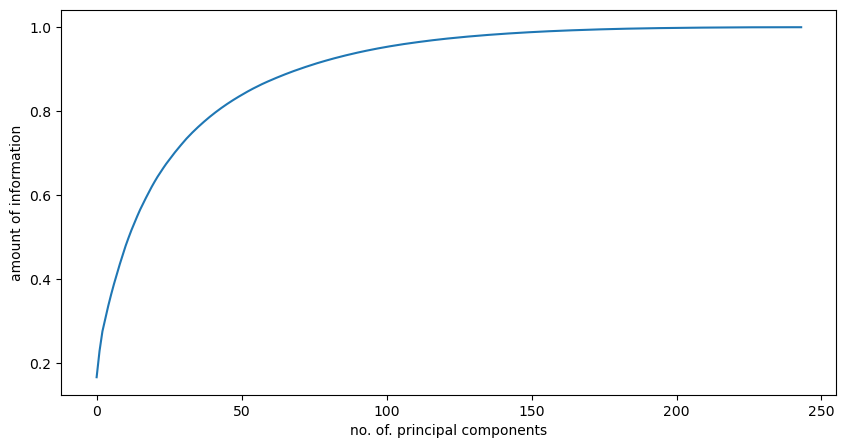

In [296]:
plt.figure(figsize=(10,5))

plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('no. of. principal components')
plt.ylabel('amount of information')
plt.show()

In [ ]:
# so we can choose first 100 principal components and still retain about 95% of information

In [297]:
pca2=PCA(n_components=100)
X_sc_train_pca2=pca2.fit_transform(X_sc_train)

In [298]:
np.sum(pca2.explained_variance_ratio_) # see we retain about 95% info

0.9517960443819181

In [299]:
# creating a dataframe of the pca transformed components

X_sc_train_pca2_df=pd.DataFrame(X_sc_train_pca2)

In [300]:
X_sc_train_pca2_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2.146797,0.364309,-0.395470,-0.296171,-0.844050,-0.091835,-0.454990,-0.388643,0.407418,0.718295,0.028604,0.182115,-0.441401,-0.201912,-0.286353,0.019452,-0.015706,0.335008,-0.012267,0.088678,0.368815,-0.078695,0.343902,-0.220600,-0.008149,-0.058137,-0.171189,-0.099308,-0.403047,-0.026801,0.026059,-0.018159,-0.224469,-0.296088,-0.243951,0.107494,0.116256,-0.097623,-0.096751,0.050803,0.134166,-0.117385,-0.059006,-0.154606,0.205382,-0.056313,-0.197416,0.003367,0.131054,0.030769,-0.107657,-0.066703,0.029933,-0.020891,0.033782,0.018867,-0.035226,0.037631,0.009892,-0.036949,-0.041251,-0.050773,-0.027480,0.068577,-0.028281,0.008079,0.028344,-0.055617,-0.003386,0.050484,-0.022202,-0.087462,0.003845,0.108323,0.049642,0.020866,-0.091235,0.009777,-0.072676,0.038123,-0.051054,-0.098807,0.003678,-0.020351,0.005301,0.064816,0.027764,-0.041859,-0.047048,0.025329,-0.009429,0.020815,-0.004471,-0.042973,0.064543,0.053841,0.014659,-0.022121,-0.006183,0.003347
1,-0.295755,-1.288242,-0.428749,0.257854,-0.413103,-0.239917,-0.011511,0.126152,-0.072508,-1.235475,-0.966943,-0.599831,-0.087905,-0.273698,0.826892,-0.131341,-0.205033,0.125197,-0.931127,0.610570,0.422958,-0.825045,-0.489669,-0.070096,0.116008,0.412041,0.017081,0.057315,-0.265031,0.464160,-0.581213,-0.066009,0.140182,0.209571,-0.364962,-0.113860,0.162918,0.153511,-0.209007,0.192102,0.082900,-0.452119,0.141568,0.183688,-0.329677,0.038439,0.182927,-0.383492,0.204861,0.292889,0.076840,0.306616,-0.347950,0.196018,-0.427254,0.067685,0.070163,-0.219714,-0.015087,-0.013179,0.092762,-0.076006,-0.146446,0.007908,-0.078147,0.130005,0.133567,0.247296,-0.045914,-0.454648,0.260034,0.197950,-0.030856,-0.063496,0.284488,-0.357891,-0.151600,0.169114,0.221483,0.330236,-0.042395,-0.181221,-0.024675,-0.112270,-0.167403,-0.233376,0.159878,-0.009803,0.121004,0.153513,-0.009489,-0.214287,0.119942,-0.143293,-0.320694,-0.066075,0.038193,0.206067,0.128311,0.029816


In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_sc_train_pca2_df,Y,train_size=0.75,random_state=101)

## xgboost

In [314]:
# basic

In [339]:
xgbr=XGBRegressor()
xgbr.fit(X_train, Y_train)
Y_train_predict=xgbr.predict(X_train)
Y_test_predict=xgbr.predict(X_test)

In [340]:
r2_score(Y_test, Y_test_predict)

0.6875298042829521

In [341]:
r2_score(Y_train, Y_train_predict)

0.9999989041526491

In [ ]:
# insights: using pca X_train data, the base model of xgboost itself is worse than without pca

In [ ]:
# tuned

In [342]:
%%time
param_grid_xgbr={'n_estimators': [50,100,200],
           'learning_rate': [0.1, 0.01,0.001, 1, 2]} # this effects how the new weights are updated


xgbr=XGBRegressor()
random_cv_xgbr=RandomizedSearchCV(xgbr, param_distributions=param_grid_xgbr,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_xgbr.fit(X_train, Y_train)

CPU times: total: 16min 19s
Wall time: 1min 33s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=1000,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 1,
                                                          2],
                                        'n_estimators': [50, 100, 200]},
                   random_state=101, scoring='neg_mean_squared_error')

In [343]:
Y_train_predict=random_cv_xgbr.predict(X_train)
Y_test_predict=random_cv_xgbr.predict(X_test)

In [344]:
r2_score(Y_test, Y_test_predict) # this is the r2score corresponding to the best fit parameter but for this sample data of X_test and Y_test

0.7117879762943387

In [345]:
r2_score(Y_train, Y_train_predict)

0.9999603969714167

In [346]:
random_cv_xgbr.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [347]:
random_cv_xgbr.best_score_

-1680471236.6878152

In [ ]:
# it is giving worse result on test data than without pca after tuning

In [ ]:
# cross-val score

In [348]:
model=XGBRegressor(n_estimators=200, learning_rate=0.1)
r2_score_cv_xgbr=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv_xgbr

array([0.68325595, 0.67534112, 0.78410123, 0.7756979 , 0.7997615 ])

In [349]:
r2_score_cv_xgbr.mean()

0.743631540336066

In [ ]:
# insight: 
# without pca: cross-val test acc was 0.84
# with pca: cross-val test acc is 0.74

# so a 10% reduction in test acc on doing pca for the best performing model 

## adaboost

In [352]:
adar=AdaBoostRegressor()
adar.fit(X_train, Y_train)
Y_train_predict=adar.predict(X_train)
Y_test_predict=adar.predict(X_test)

In [353]:
r2_score(Y_test, Y_test_predict)

0.5872037470330582

In [354]:
r2_score(Y_train, Y_train_predict)

0.771341967759418

In [ ]:
# insight:
# the performance of base model of adaboost is much worse than that without pca

In [372]:
%%time
param_grid_adar={'estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5)], 
            'n_estimators': [50,100,200],
           'learning_rate': [0.1, 0.01,0.001, 1, 2],
           'loss': ['linear', 'square', 'exponential']} # this effects how the new weights are updated


adar=AdaBoostRegressor()
random_cv_adar=RandomizedSearchCV(adar, param_distributions=param_grid_adar,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_adar.fit(X_train, Y_train)

CPU times: total: 31min 49s
Wall time: 33min 46s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=1000,
                   param_distributions={'estimator': [DecisionTreeRegressor(max_depth=3),
                                                      DecisionTreeRegressor(max_depth=4),
                                                      DecisionTreeRegressor(max_depth=5)],
                                        'learning_rate': [0.1, 0.01, 0.001, 1,
                                                          2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=101, scoring='neg_mean_squared_error')

In [373]:
random_cv_adar.best_estimator_

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), learning_rate=1,
                  loss='exponential', n_estimators=100)

In [374]:
random_cv_adar.best_score_

-1888704562.8663173

In [375]:
Y_train_predict=random_cv_adar.predict(X_train)
Y_test_predict=random_cv_adar.predict(X_test)

In [376]:
r2_score(Y_test, Y_test_predict)

0.7000966653472063

In [377]:
r2_score(Y_train, Y_train_predict)

0.9218544842143569

In [378]:
from sklearn.model_selection import cross_val_score

model=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), learning_rate=1,
                  loss='exponential', n_estimators=100)
r2_score_cv=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')

In [379]:
r2_score_cv

array([0.63281542, 0.70774654, 0.76138925, 0.69276934, 0.73191396])

In [380]:
r2_score_cv.mean()

0.7053269041611584

In [ ]:
# insights: 


# the cross val test acc: without pca : is 80%
# the cross val test acc: without pca : is 70%

# reduction by 10%.
# even in xgboost the reduction is by 10%

## random forest regressor

In [382]:
rfr=RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_train_predict=rfr.predict(X_train)
Y_test_predict=rfr.predict(X_test)

In [383]:
r2_score(Y_test, Y_test_predict)

0.6770051548698739

In [384]:
r2_score(Y_train, Y_train_predict) 

0.9629230181040582

In [ ]:
# insight:

# again the base model itself is performing worse on pca data than before

In [ ]:
# tuning

In [385]:
rfr=RandomForestRegressor()

param_grid_rfr={'max_depth':[6,7,8],
               'min_samples_leaf': [13,15,17],
               'n_estimators': [100, 200, 300],
               'max_features': ["sqrt", "log2", None]}



random_cv_rfr=RandomizedSearchCV(rfr, param_distributions=param_grid_rfr,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_rfr.fit(X_train, Y_train)# here on fitting to Xtrain and Ytrain, it finds the best hyperparameters and then refits this random_search_cv model with these best hypeparamters. so randomsearchCV requires this first fit line to actually find the best hyperparams. after this the randomsearchcv object does not behave like a randomsearch cv object coz now it is refitted with the best hypeparams already. so any fit method called again after this on randomsearchcv object will simply re-fit those best hypeparamters to the data provided. randomsearchCV obj only performs randomsearch once to find the best hypeparameters, once the best hypeparams are found, calling fit again on this randomsearchcv obj just fits the best hypeparams again rather performing a new randomsearch again. that is how this randomsearchcv obj is defined in sklearn.



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   param_distributions={'max_depth': [6, 7, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [13, 15, 17],
                                        'n_estimators': [100, 200, 300]},
                   random_state=101, scoring='neg_mean_squared_error')

In [386]:
random_cv_rfr.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 13,
 'max_features': None,
 'max_depth': 8}

In [387]:
random_cv_rfr.best_score_

-2122564096.9179363

In [388]:
%%time

model=RandomForestRegressor(n_estimators= 100,
 min_samples_leaf= 13,
 max_features= None,
 max_depth= 8)
r2_score_cv=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv

CPU times: total: 14.9 s
Wall time: 15.6 s


array([0.61469174, 0.5789326 , 0.73773605, 0.65934762, 0.73828338])

In [389]:
r2_score_cv.mean()

0.6657982805746612

In [ ]:
# insight:

# the test score is consistently less for all models using pca

# importantly: the mse error of models using pca is lower than that without pca. 
# so it means that using pca the fitting of the model is getting better and that it is leading to overfitting and thus the 
# test scores on the unknown data are suffering due to overfit models when using pca.

# Part 3

# using yeo-johnson transformation here to see if normalizing data improves the accuracy. But wont use pca this time.

In [ ]:
# first checking whether the variables are normally distributed or not

In [58]:
X.columns.to_list()
X.loc[:,'MSSubClass':'YrSold'] # selecting only the numerical columns and not the encoded categorical cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


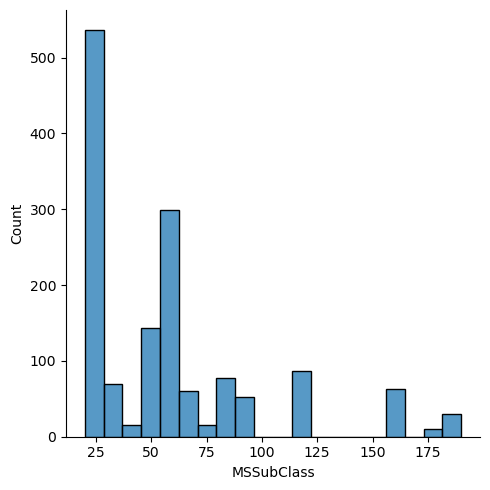

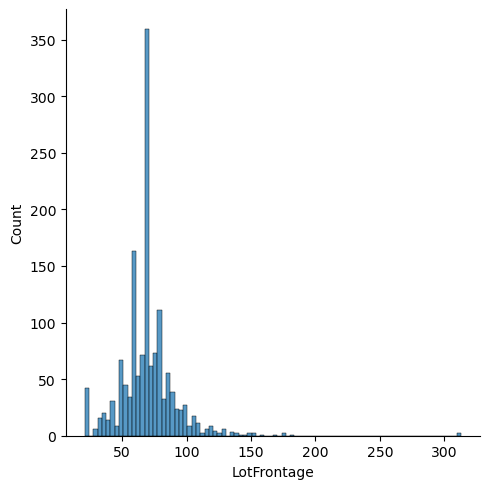

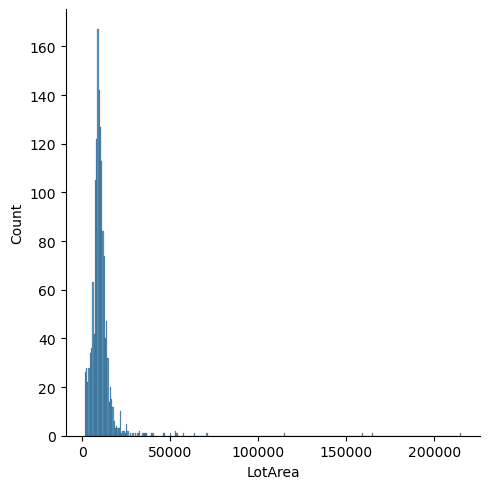

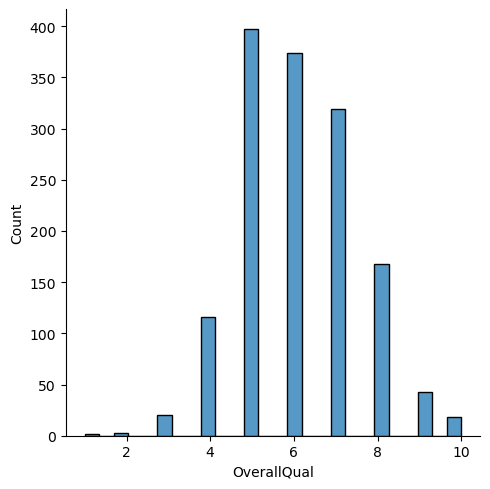

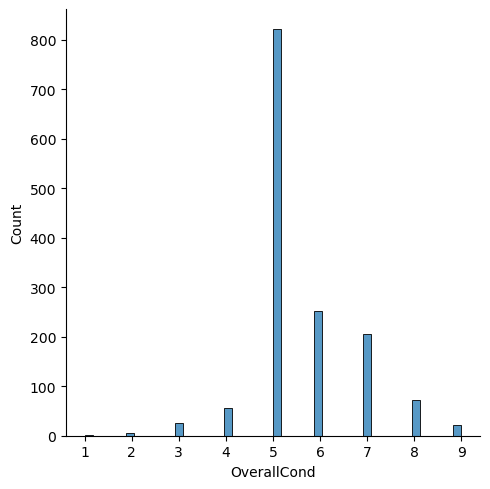

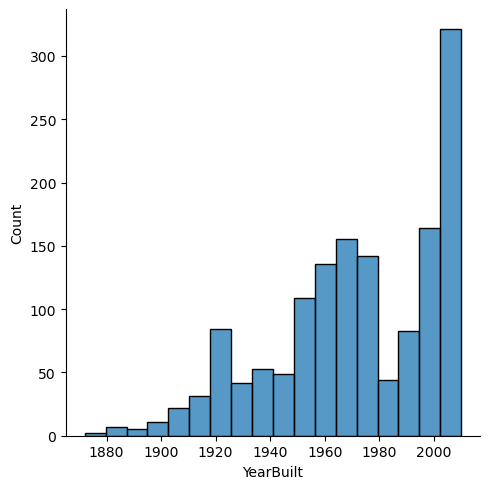

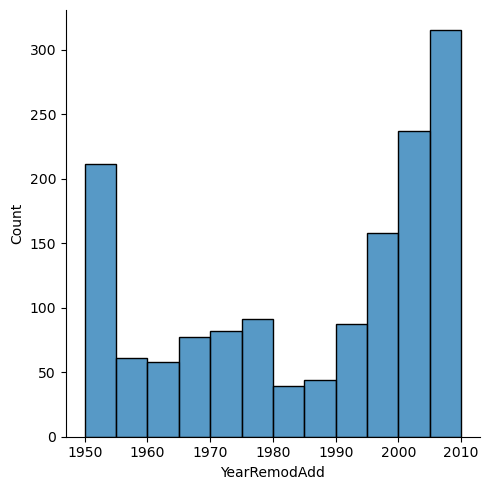

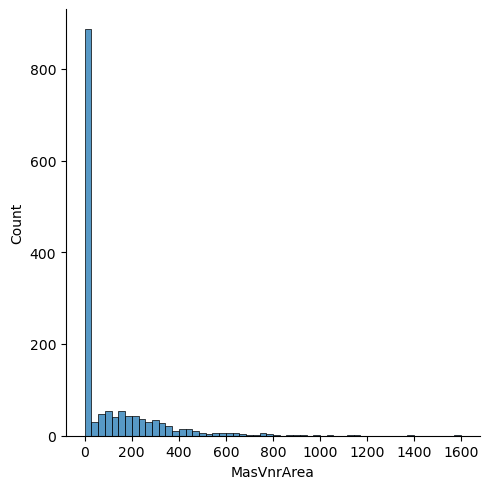

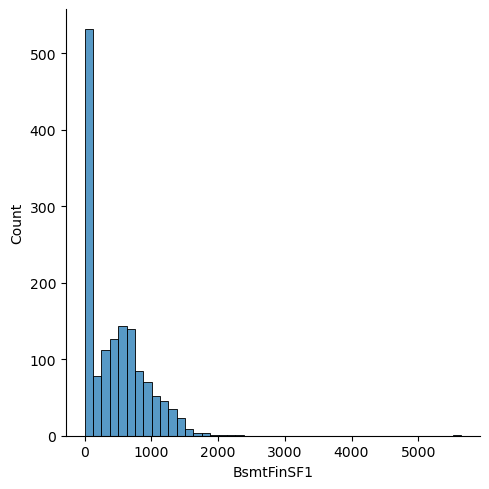

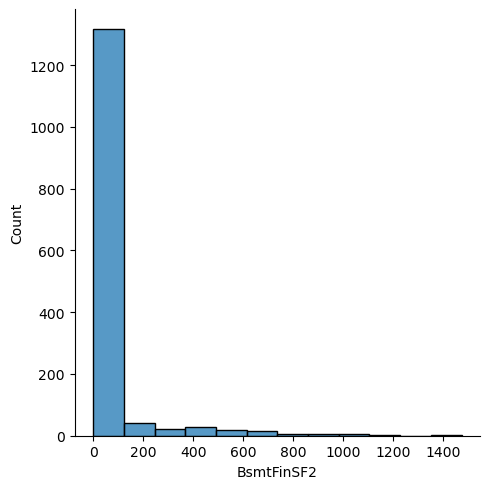

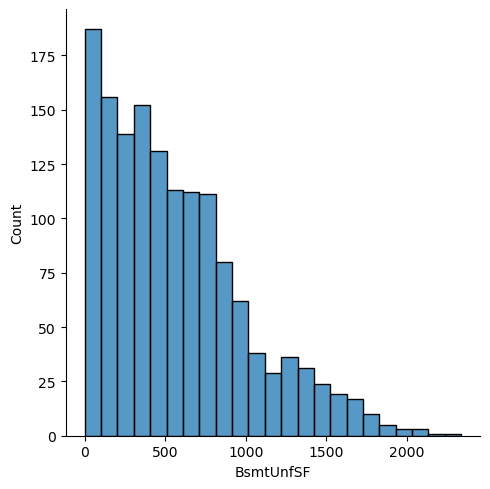

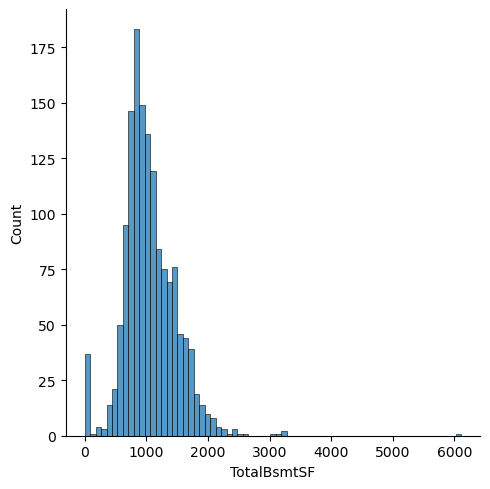

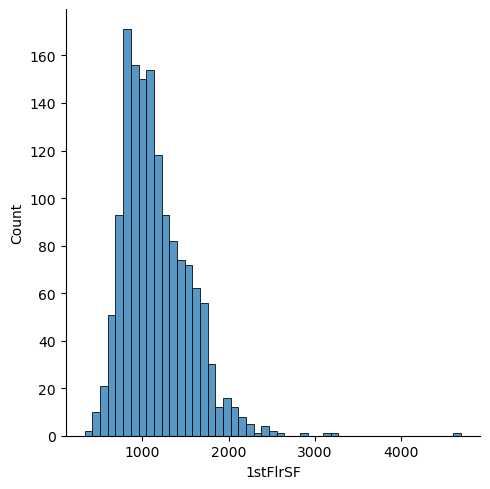

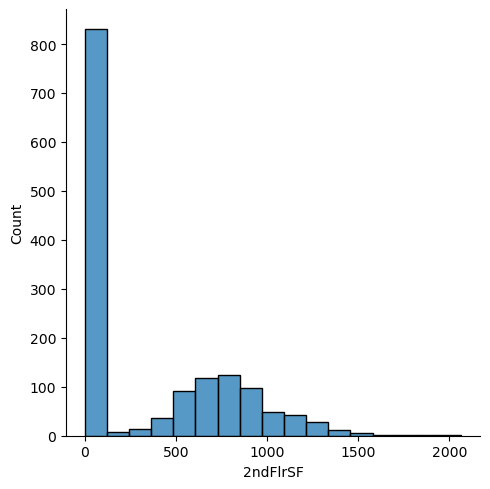

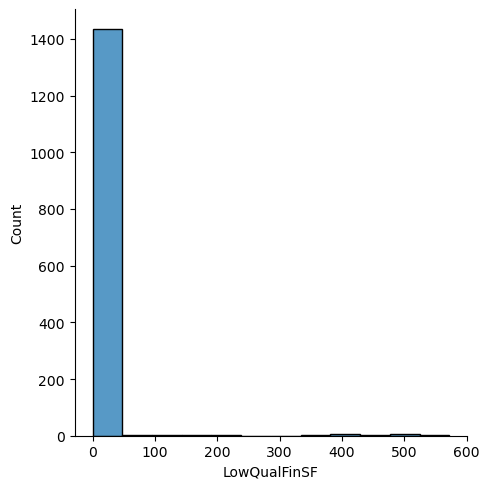

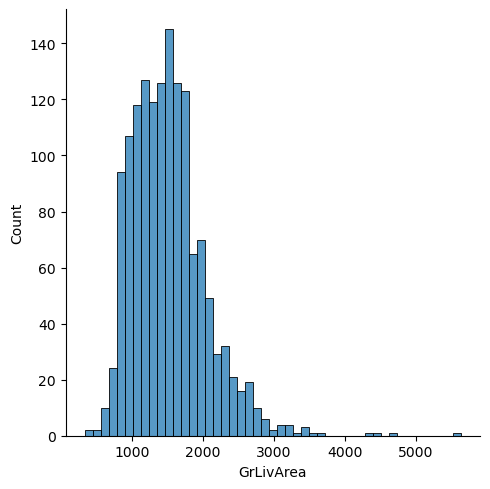

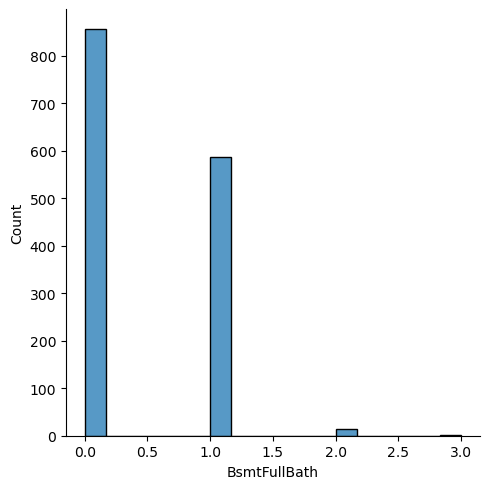

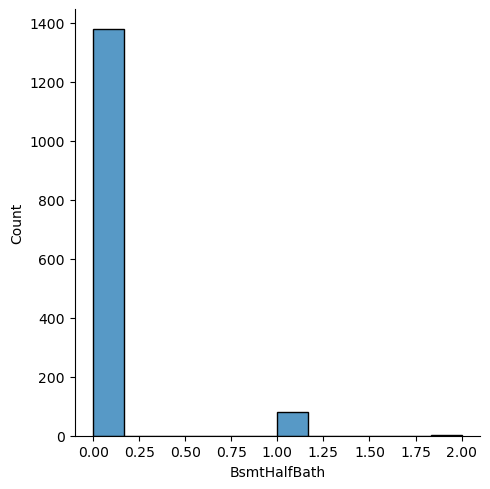

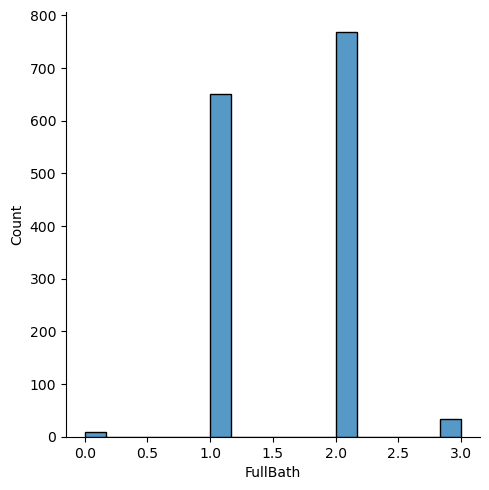

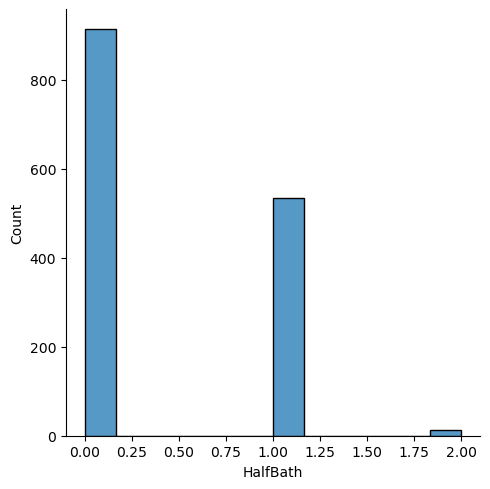

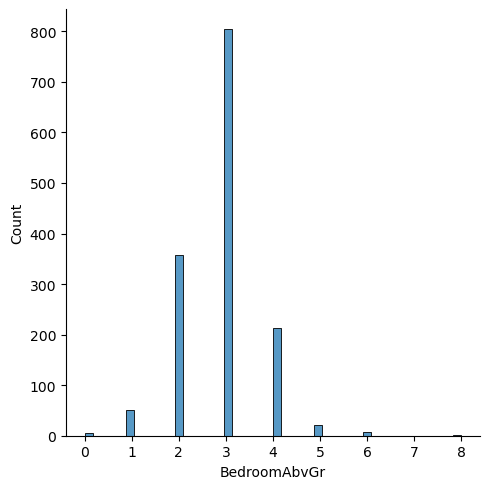

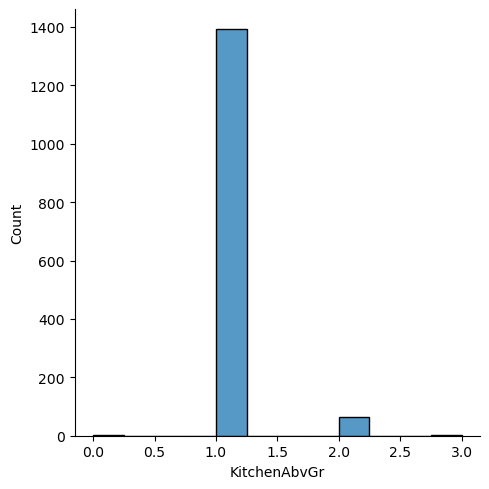

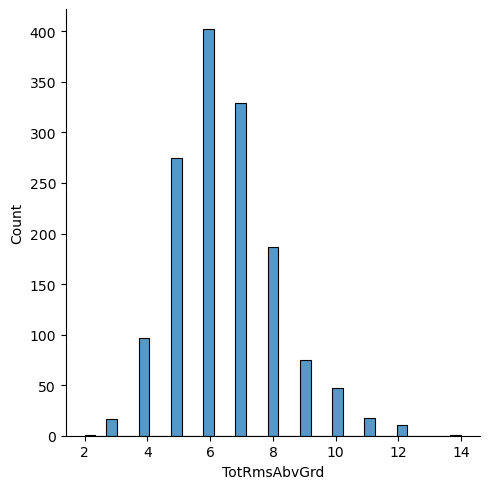

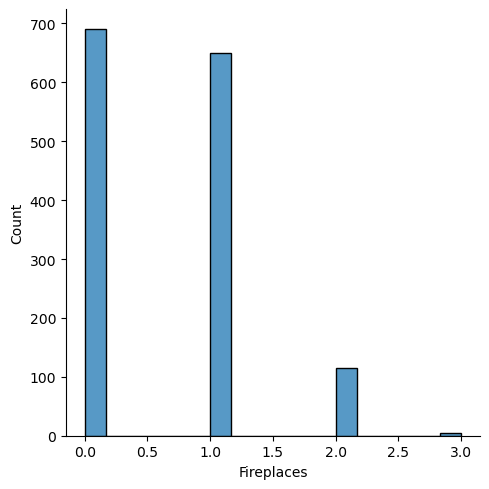

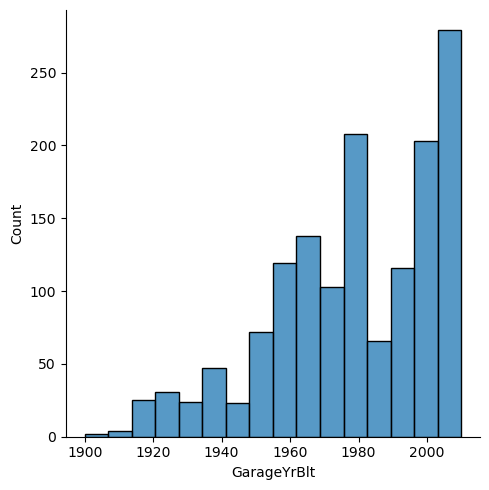

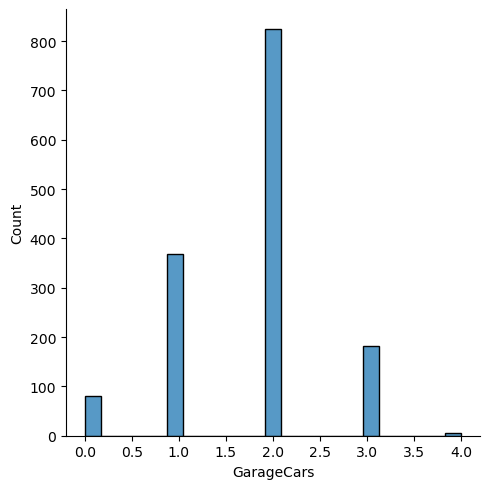

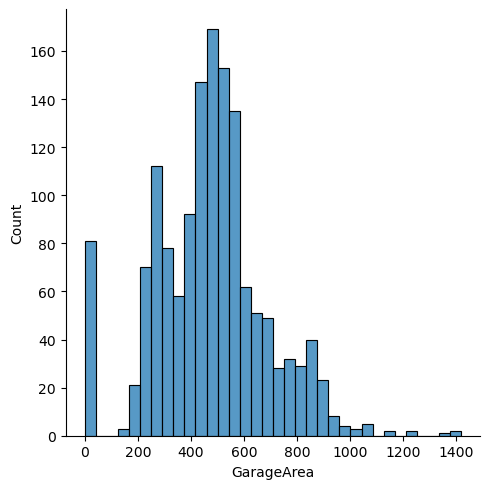

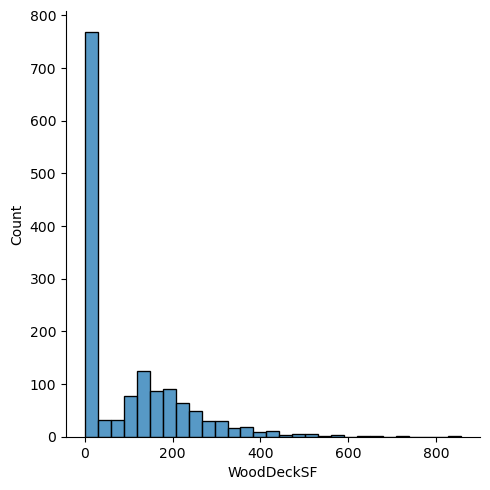

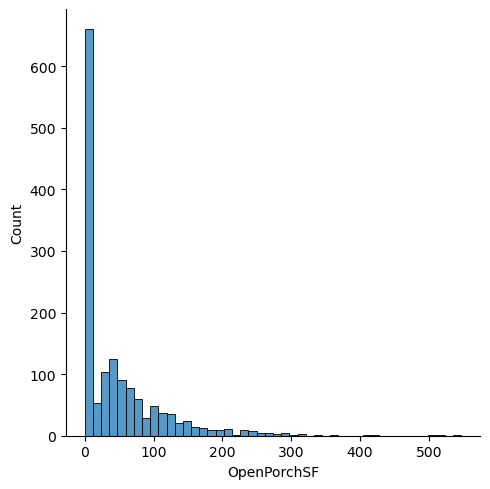

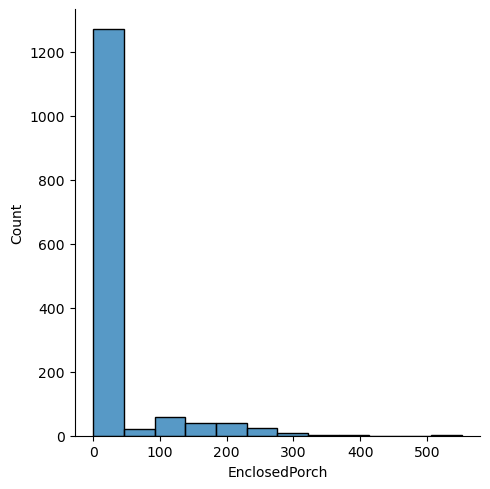

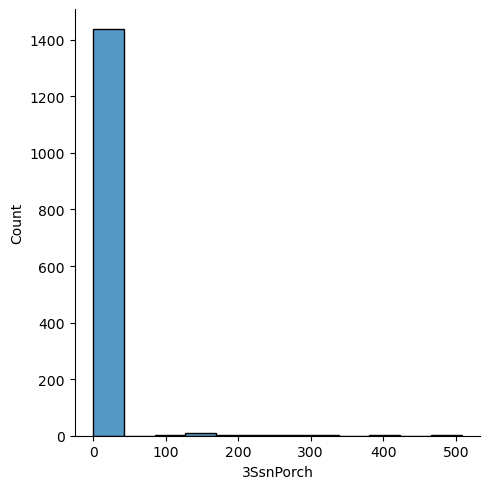

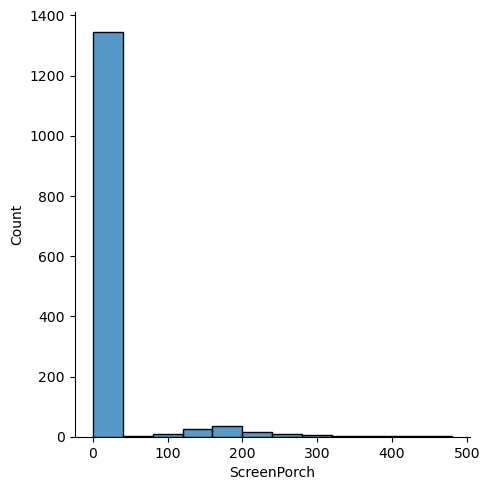

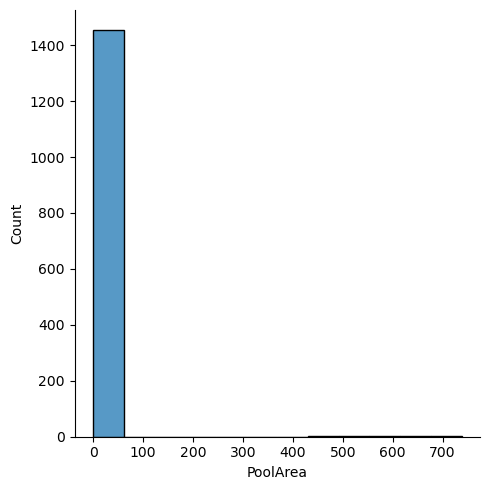

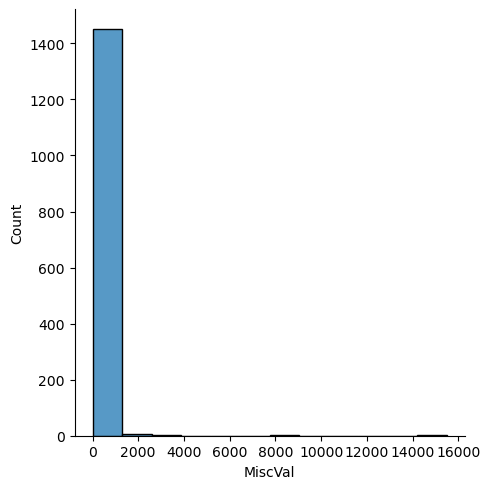

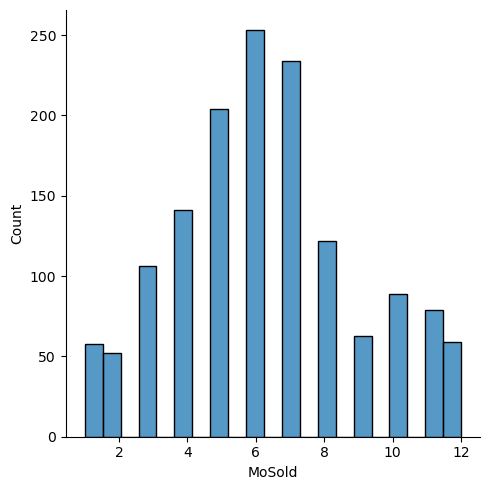

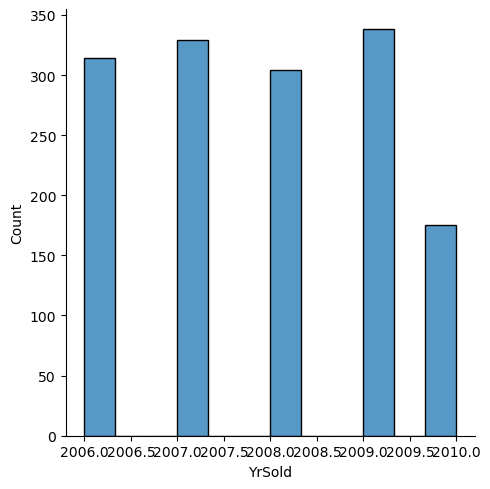

In [59]:
for i in X.loc[:,'MSSubClass':'YrSold'].columns:# selecting only the numerical columns and not the encoded categorical cols
    sns.displot(data=X, x=i)
    plt.show()

In [ ]:
# so the columns are not normally distributed.

In [ ]:
# applying power transform of yeo-johnson: yeo-johnson is chosen because it does not require the data to be strictly non-zero and positive. can also try boxcox.
# it can accept negative and zero values as well unlike box-cox transformation to convert to normal distribution.

In [ ]:
#steps to be taken:
# scaling--> yeo-johnson--> no multicollinearity check--> model building

In [60]:
#Scaling on train data (just the numerical cols)
from sklearn.preprocessing import MinMaxScaler # using min max coz it does not affect the scaling of OHE cols and hence we dont need to do separately for numerical and categorical cols
scaler=MinMaxScaler()
X_sc_train=scaler.fit_transform(X) # here the X remains unchanged but new X_sc_train is the transformed version of X.
X_sc_train=pd.DataFrame(X_sc_train, columns=X.columns)


In [61]:
obj_train_cols # object cols in the original data (i.e. cols on which OHE is applied)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# applying yeo-johnson on only the numerical cols which are not categorical(object cols/ OHE encoded cols)

In [62]:
X_sc_train_yeo=X_sc_train.loc[:, 'MSSubClass':'YrSold'] # selecting only numerical cols for yeo-johnson transformation

In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
pt=PowerTransformer(method='yeo-johnson')
X_sc_train_yeo_scaled= pt.fit_transform(X_sc_train_yeo)
X_sc_train_yeo_scaled=pd.DataFrame(data=X_sc_train_yeo_scaled, columns=X_sc_train_yeo.columns)

In [ ]:
# final train data

In [65]:
X_train_sc_yeo=pd.concat([X_sc_train_yeo_scaled, X_sc_train.loc[:, 'MSZoning_FV':'SaleCondition_Partial']], axis=1)

In [ ]:
# not checking for multicollinearity and directly building the model

In [ ]:
# splitting the data into independent and dependent variable

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_train_sc_yeo,Y,train_size=0.75,random_state=101)

In [ ]:
#xgboost

In [71]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
# basic model

In [72]:
xgbr=XGBRegressor()
xgbr.fit(X_train, Y_train)
Y_train_predict=xgbr.predict(X_train)
Y_test_predict=xgbr.predict(X_test)

In [75]:
r2_score(Y_test, Y_test_predict)

0.861396069207684

In [76]:
r2_score(Y_train, Y_train_predict)

0.9998133506216917

In [79]:
model=XGBRegressor()
r2_score_cv_xgbr=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv_xgbr

array([0.85002986, 0.72857426, 0.87513205, 0.85697556, 0.85531205])

In [80]:
r2_score_cv_xgbr.mean()

0.8332047563233191

In [ ]:
# insight: scaling the data does not affect the accuracy of a tree like model XGBoost
# not removing multicollinearity also didnt affect the model building or accuracy of a tree based model like xgboost 
# as it is the same as that in the case when we didnt do yeo-johnson but we removed multicollinearity above. whereas right now we didnt remove multicollinearity but applied yeo johnson
# maximum accuracy possible to be reached is around 83 even after doing yeo-johnson.

In [ ]:
# tuned

In [83]:
%%time
param_grid_xgbr={'n_estimators': [50,100,200],
           'learning_rate': [0.1, 0.01,0.001, 1, 2]} # this effects how the new weights are updated


xgbr=XGBRegressor()
random_cv_xgbr=RandomizedSearchCV(xgbr, param_distributions=param_grid_xgbr,n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=101)
random_cv_xgbr.fit(X_train, Y_train)

CPU times: total: 12min 20s
Wall time: 1min 10s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=1000,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 1,
                                                          2],
                                        'n_estimators': [50, 100, 200]},
                   random_state=101, scoring='neg_mean_squared_error')

In [84]:
Y_train_predict=random_cv_xgbr.predict(X_train)
Y_test_predict=random_cv_xgbr.predict(X_test)

In [85]:
r2_score(Y_test, Y_test_predict) # this is the r2score corresponding to the best fit parameter but for this sample data of X_test and Y_test

0.8820017548146415

In [86]:
r2_score(Y_train, Y_train_predict)

0.998962235541886

In [87]:
random_cv_xgbr.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [88]:
random_cv_xgbr.best_score_

-981859040.5302156

In [ ]:
# cross-val-score

In [89]:
model=XGBRegressor(n_estimators=200, learning_rate=0.1)
r2_score_cv_xgbr=cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
r2_score_cv_xgbr

array([0.87731821, 0.72809243, 0.88473527, 0.85766264, 0.87895696])

In [90]:
r2_score_cv_xgbr.mean()# this is the mean r2score of the best fit pramameter model for the 

0.8453530996850211

In [ ]:
#insight, not deleting multicollinearity and applying yeo-johnson is not creating any substantial change in the accuracy of the 
# model.The average cross-val accuracy of the models for this data is around 83-84%.

In [ ]:
# XGBRegressor gives the best test r2-score after CV.

In [ ]:
 By Jeel Raval